<a href="https://colab.research.google.com/github/Rahman17309/ASSIGNMENT1/blob/main/PCA_wine_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [14]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Exploration

In [15]:
# Importing dataset
df = pd.read_csv('/content/wine.csv')
df.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [16]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [17]:
df.shape

(178, 14)

In [18]:
df['Type'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [19]:
df.Type.unique()

array([1, 2, 3])

In [20]:
df.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

Dropping Type Feature as it is a classifier that we have three types of wines which we need to find in clustering by keeping it will affect our inferences and further analysis

In [21]:
df['ID'] = range(1, 179, 1)
df

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline   ID  
0             0.28             2.29   5.64  1.04      3.92     1065    1  
1             0.26             1.28   4.38  1.05      3.40     1050    2  
2             0.30             2.81   5.68  1.03      3.17     1185    3  
3             0.24             2.18   7.80  0.86      3.45     1480    4  
4             0.39             1.82   4.32  1.04      2.93      735    5  
..             ...              ...    ...   ...       ...      ...  ...  
173           0.52             1.06   7.70  0.64      1.74      740  174  
174           0.43             1.41   7.30  0.70      1.56      750  175  
175           0.43             1.35  10.20  0.59      1.56      835  176  
176           0.53             1.46   9.30  0.60      1.62      840  177  
177           0.56             1.35   9.20  0.61      1.60      560  178  

[178 rows x 15 columns]

In [22]:
df1 = df.drop('Type',axis=1)

Descriptive Statistics

In [23]:
df1.describe().T

count        mean         std     min       25%      50%  \
Alcohol          178.0   13.000618    0.811827   11.03   12.3625   13.050   
Malic            178.0    2.336348    1.117146    0.74    1.6025    1.865   
Ash              178.0    2.366517    0.274344    1.36    2.2100    2.360   
Alcalinity       178.0   19.494944    3.339564   10.60   17.2000   19.500   
Magnesium        178.0   99.741573   14.282484   70.00   88.0000   98.000   
Phenols          178.0    2.295112    0.625851    0.98    1.7425    2.355   
Flavanoids       178.0    2.029270    0.998859    0.34    1.2050    2.135   
Nonflavanoids    178.0    0.361854    0.124453    0.13    0.2700    0.340   
Proanthocyanins  178.0    1.590899    0.572359    0.41    1.2500    1.555   
Color            178.0    5.058090    2.318286    1.28    3.2200    4.690   
Hue              178.0    0.957449    0.228572    0.48    0.7825    0.965   
Dilution         178.0    2.611685    0.709990    1.27    1.9375    2.780   
Proline          178.0  746.893258  314.907474  278.00  500.5000  673.500   
ID               178.0   89.500000   51.528309    1.00   45.2500   89.500   

                      75%      max  
Alcohol           13.6775    14.83  
Malic              3.0825     5.80  
Ash                2.5575     3.23  
Alcalinity        21.5000    30.00  
Magnesium        107.0000   162.00  
Phenols            2.8000     3.88  
Flavanoids         2.8750     5.08  
Nonflavanoids      0.4375     0.66  
Proanthocyanins    1.9500     3.58  
Color              6.2000    13.00  
Hue                1.1200     1.71  
Dilution           3.1700     4.00  
Proline          985.0000  1680.00  
ID               133.7500   178.00

Looking for some statistical information about each feature, we can see that the features have very diferrent scales

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
 13  ID               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Missing Values

In [25]:
missing_values = df1.isnull().sum()
print(missing_values)

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
ID                 0
dtype: int64


Duplicate Values

In [26]:
duplicate_values = df1.duplicated().sum()
print(duplicate_values)

0


No Missing / Null, Duplicate values are found we can futher proceed with EDA

# Exploratory Data Analysis

Plotting the histogram of each numerical variable

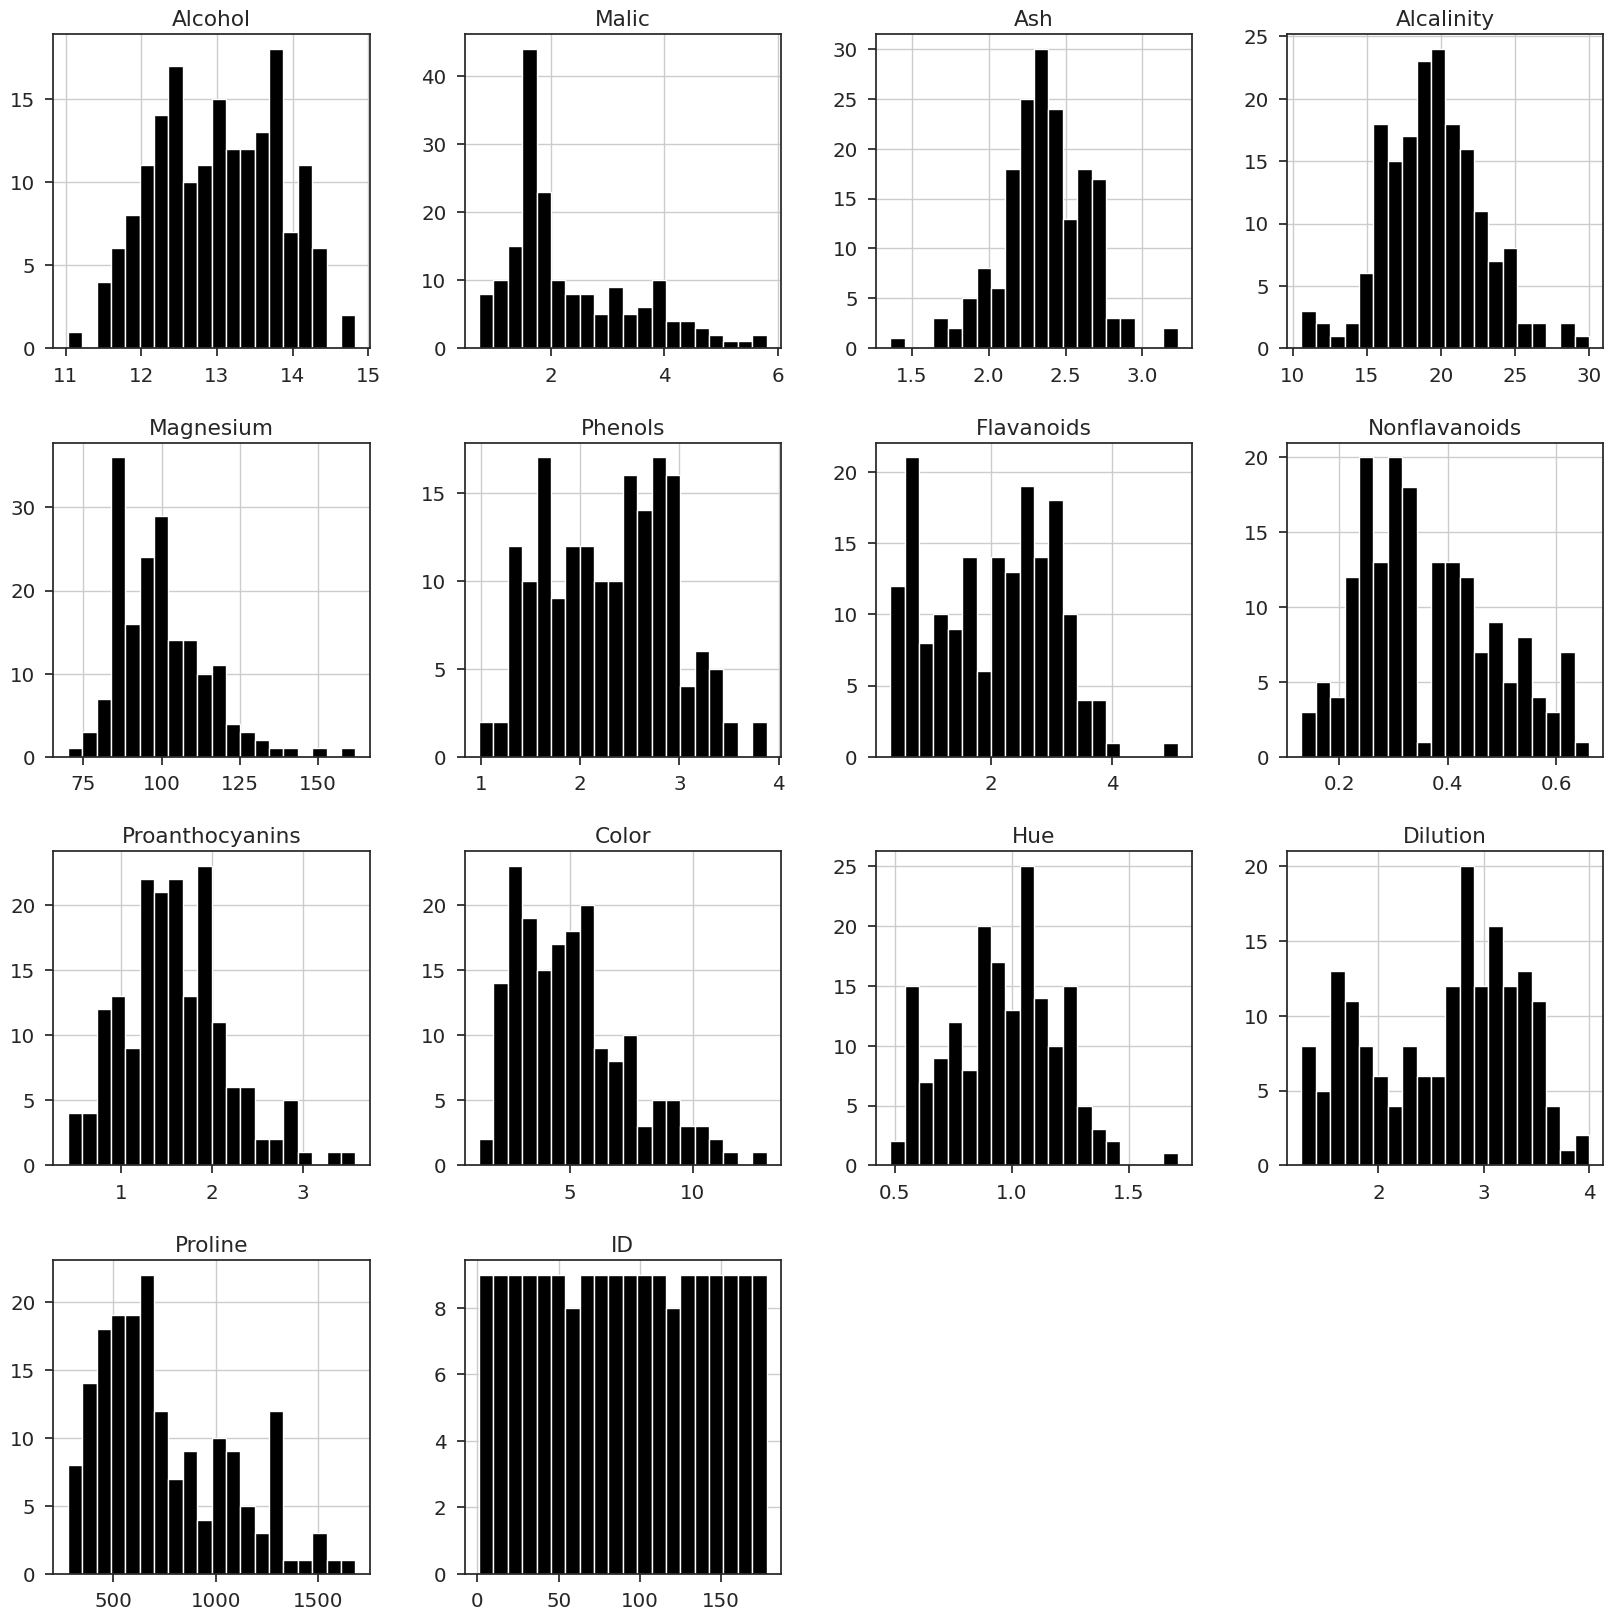

In [29]:
sns.set(style='ticks',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=df1.hist(bins=20,color='black' )

Outliers Detection


In [30]:
df1.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline', 'ID'],
      dtype='object')

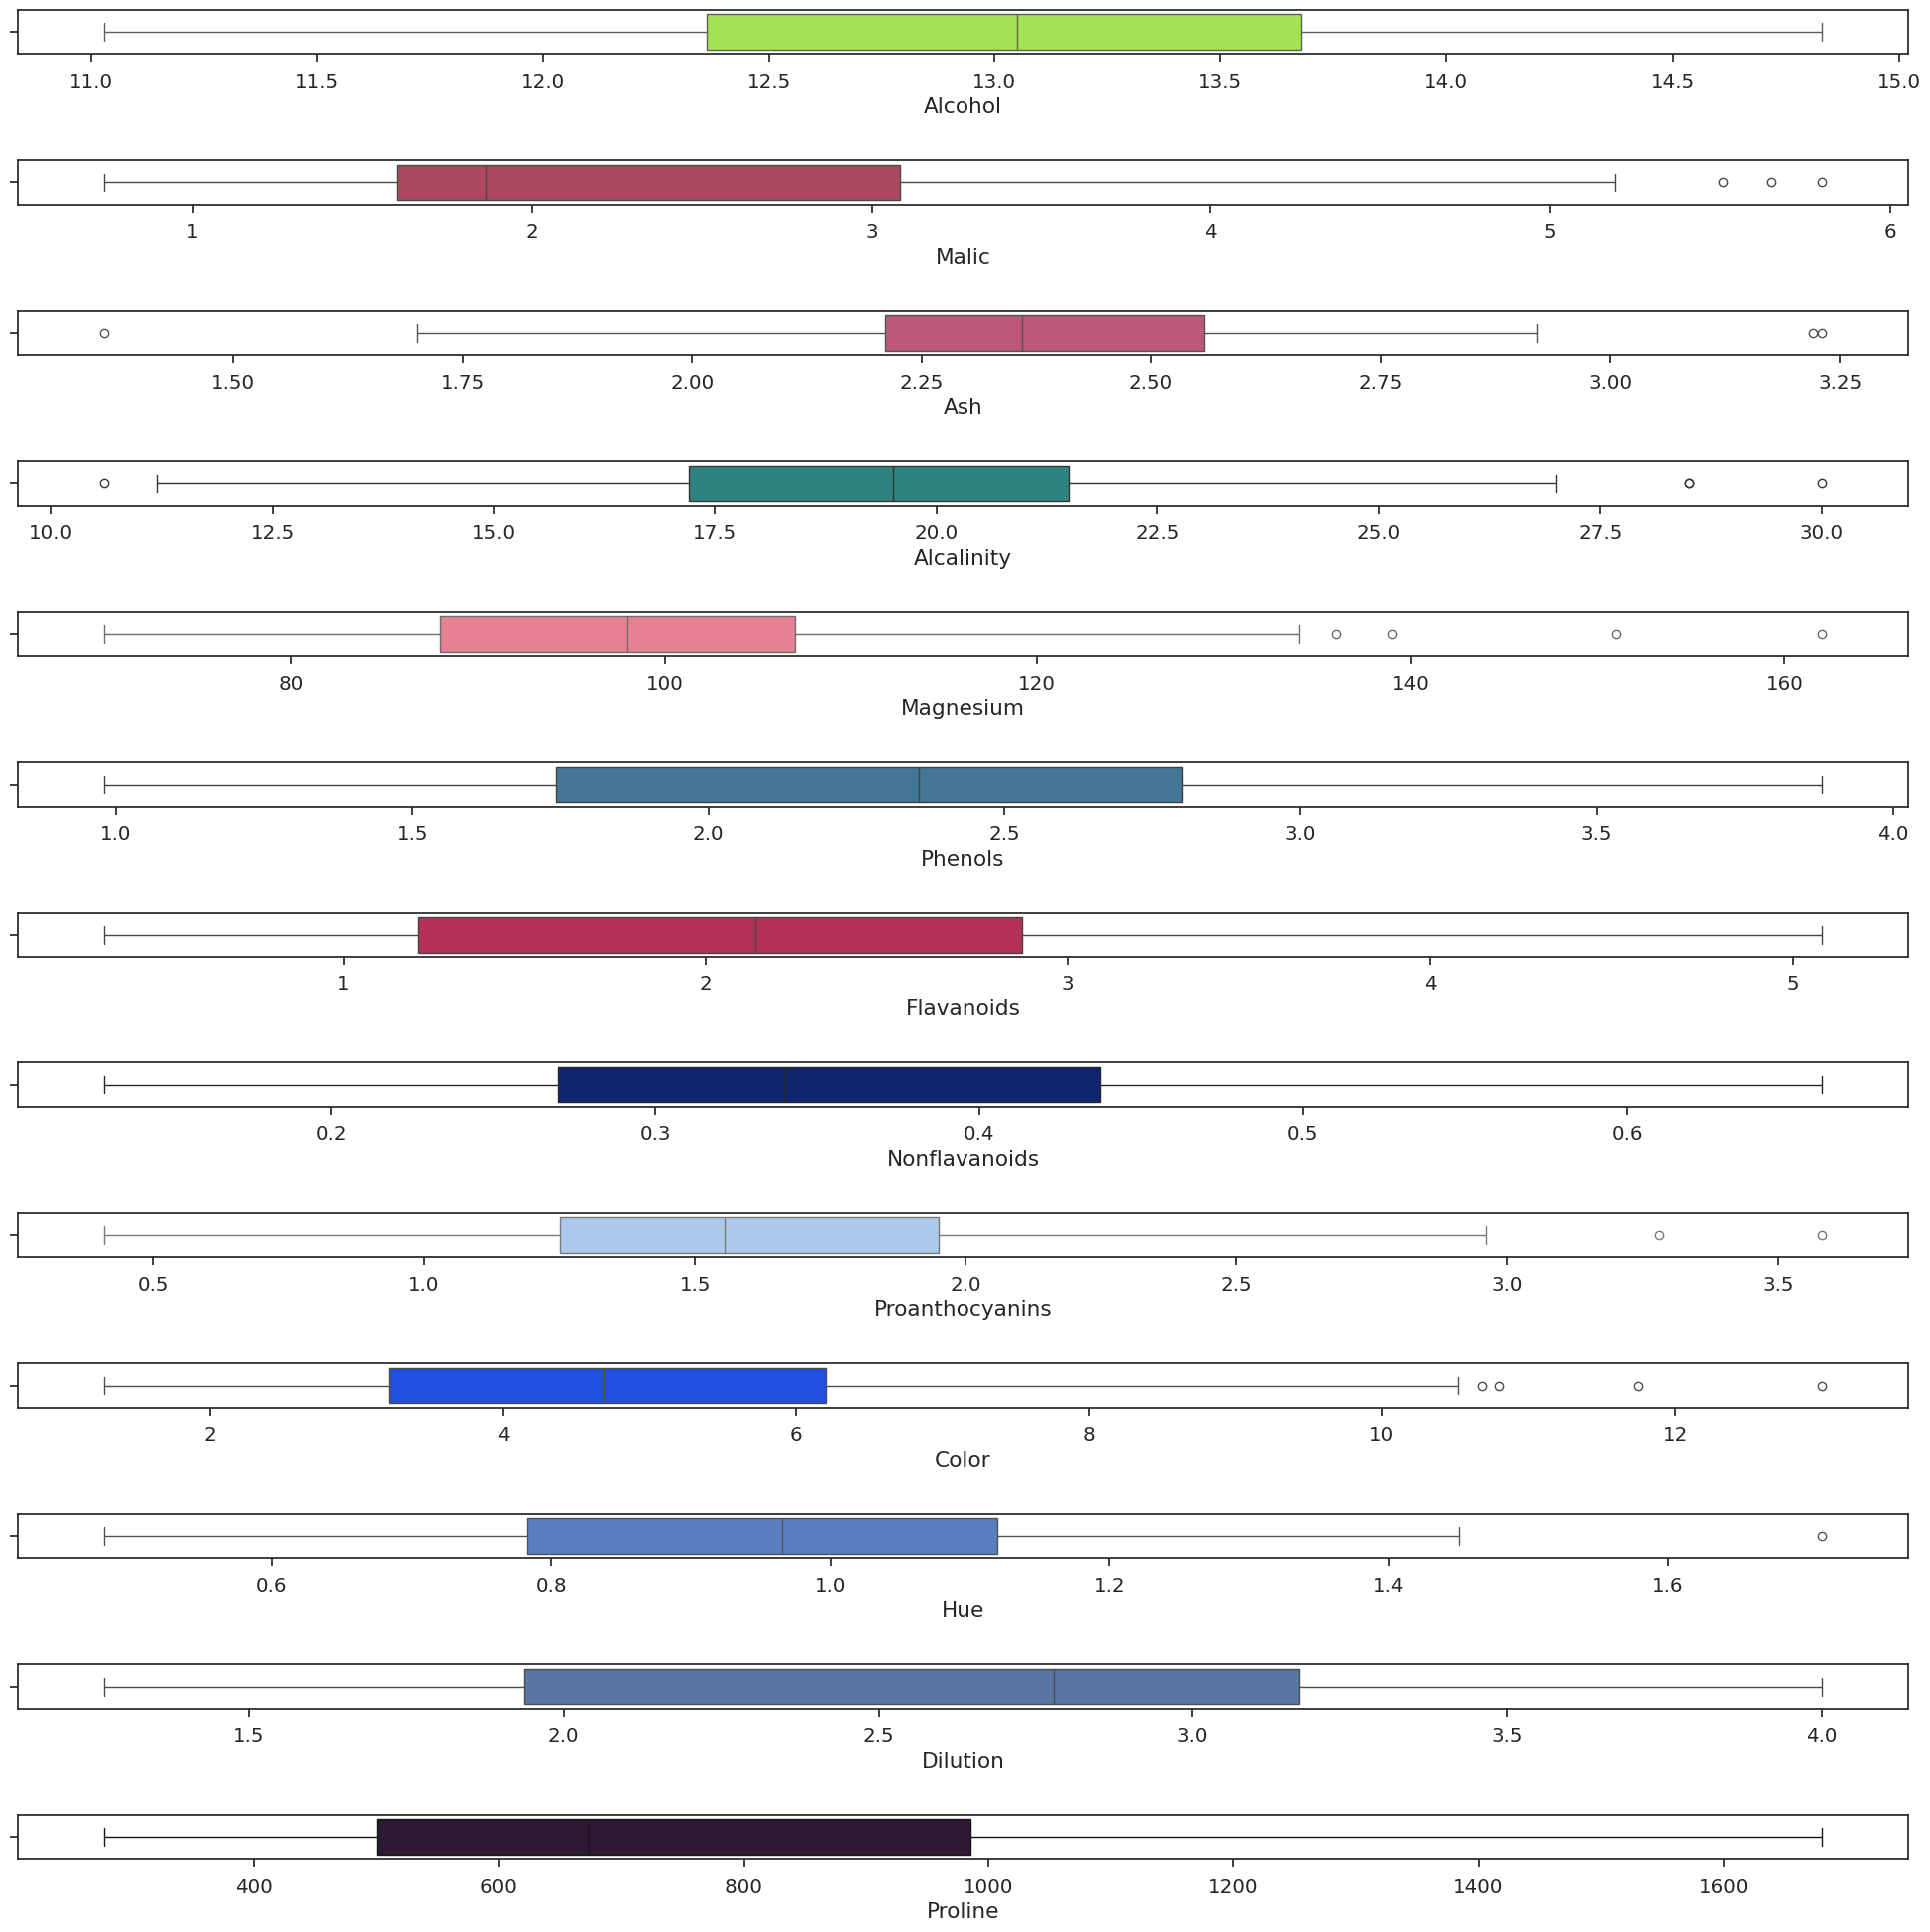

In [36]:
ot=df1.copy()
fig, axes=plt.subplots(13,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='Alcohol',data=ot,palette='turbo',ax=axes[0])
sns.boxplot(x='Malic',data=ot,palette='inferno',ax=axes[1])
sns.boxplot(x='Ash',data=ot,palette='plasma',ax=axes[2])
sns.boxplot(x='Alcalinity',data=ot,palette='viridis',ax=axes[3])
sns.boxplot(x='Magnesium',data=ot,palette='husl',ax=axes[4])
sns.boxplot(x='Phenols',data=ot,palette='mako',ax=axes[5])
sns.boxplot(x='Flavanoids',data=ot,palette='rocket',ax=axes[6])
sns.boxplot(x='Nonflavanoids',data=ot,palette='dark',ax=axes[7])
sns.boxplot(x='Proanthocyanins',data=ot,palette='pastel',ax=axes[8])
sns.boxplot(x='Color',data=ot,palette='bright',ax=axes[9])
sns.boxplot(x='Hue',data=ot,palette='muted',ax=axes[10])
sns.boxplot(x='Dilution',data=ot,palette='deep',ax=axes[11])
sns.boxplot(x='Proline',data=ot,palette='twilight',ax=axes[12])
plt.tight_layout(pad=2.0)

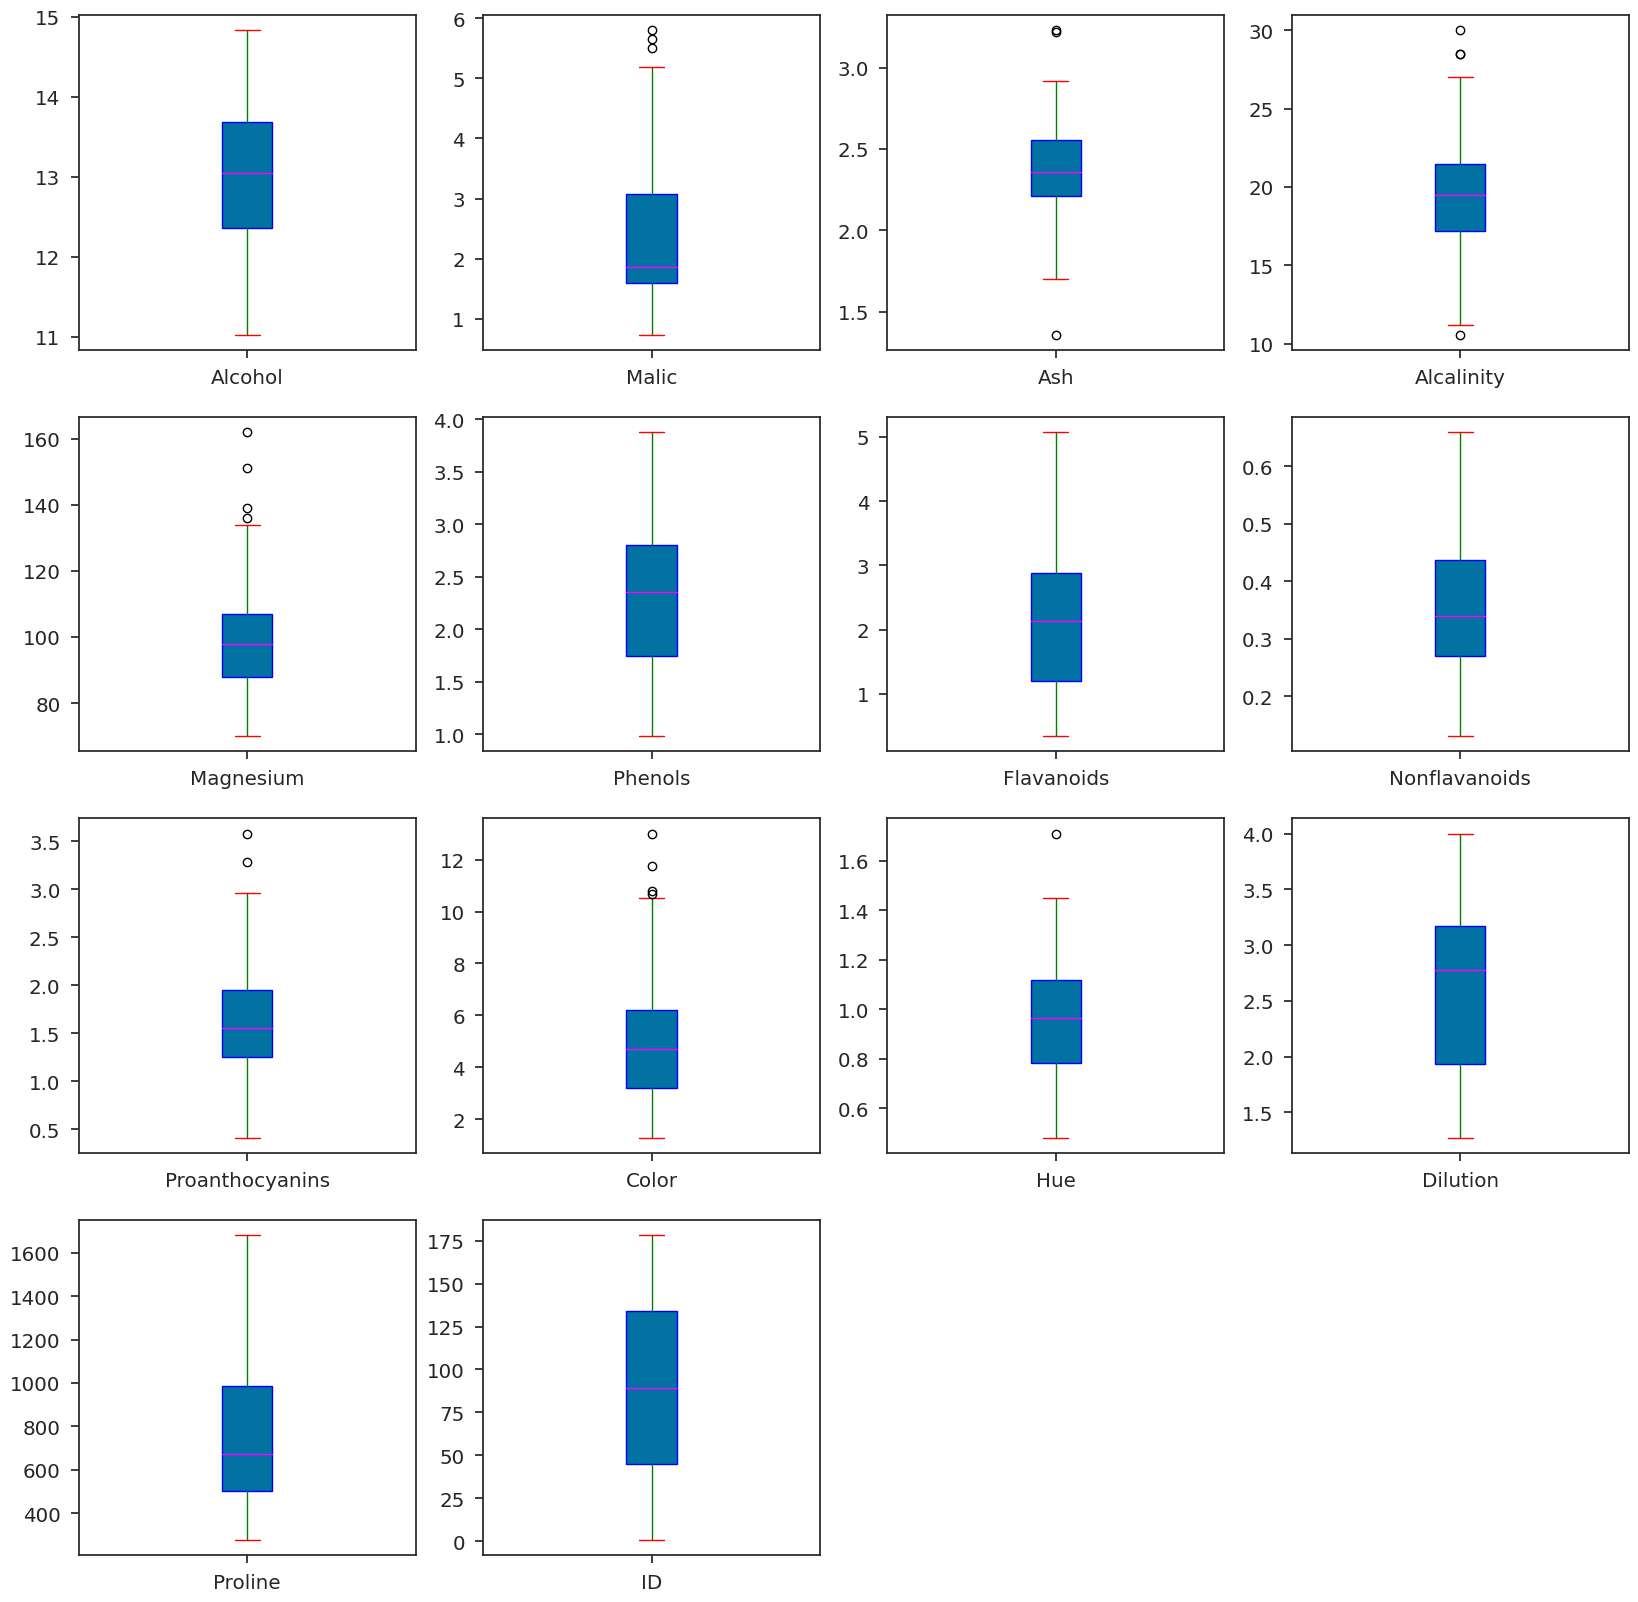

In [42]:
# Plot boxplots with custom colors
df1.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
          boxprops=dict(color="blue"),
          whiskerprops=dict(color="green"),
          capprops=dict(color="red"),
          flierprops=dict(color="cyan"),
          medianprops=dict(color="magenta"),
          patch_artist=True)
plt.show()

# Data Visualization

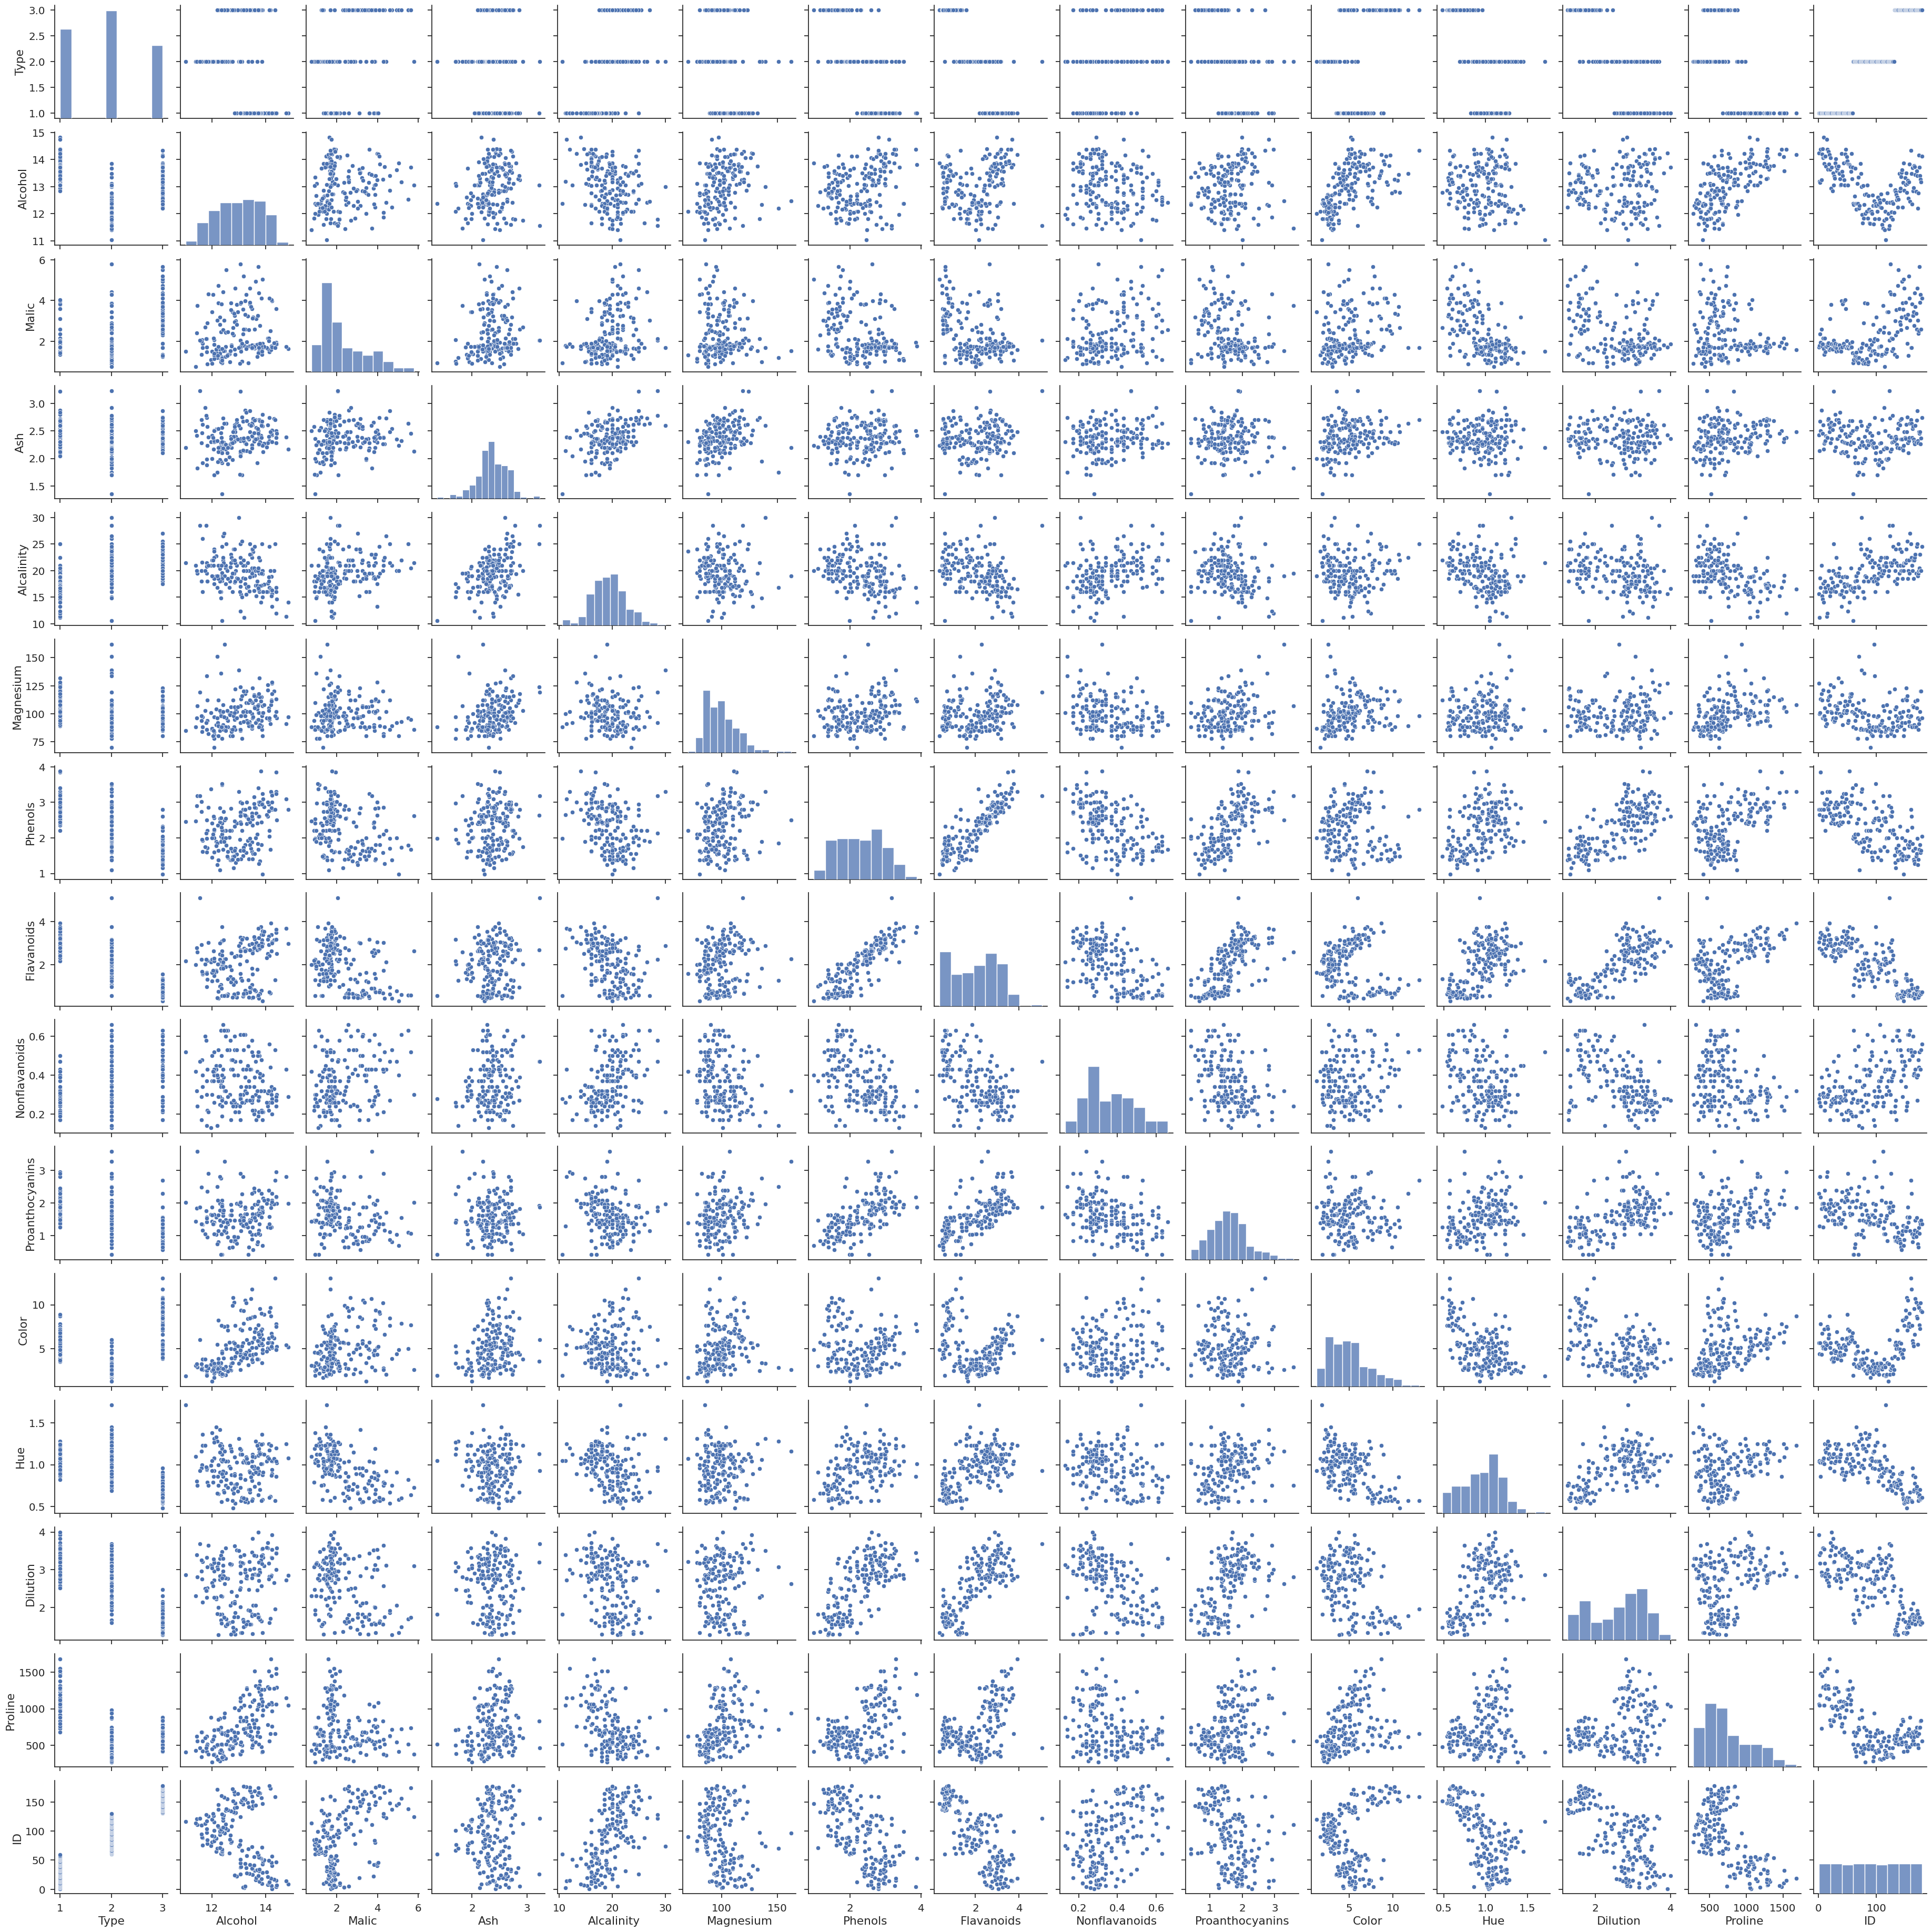

In [43]:
sns.pairplot(df,palette="husl")

correlation matrix

In [ ]:
correlation_matrix = df1.corr()

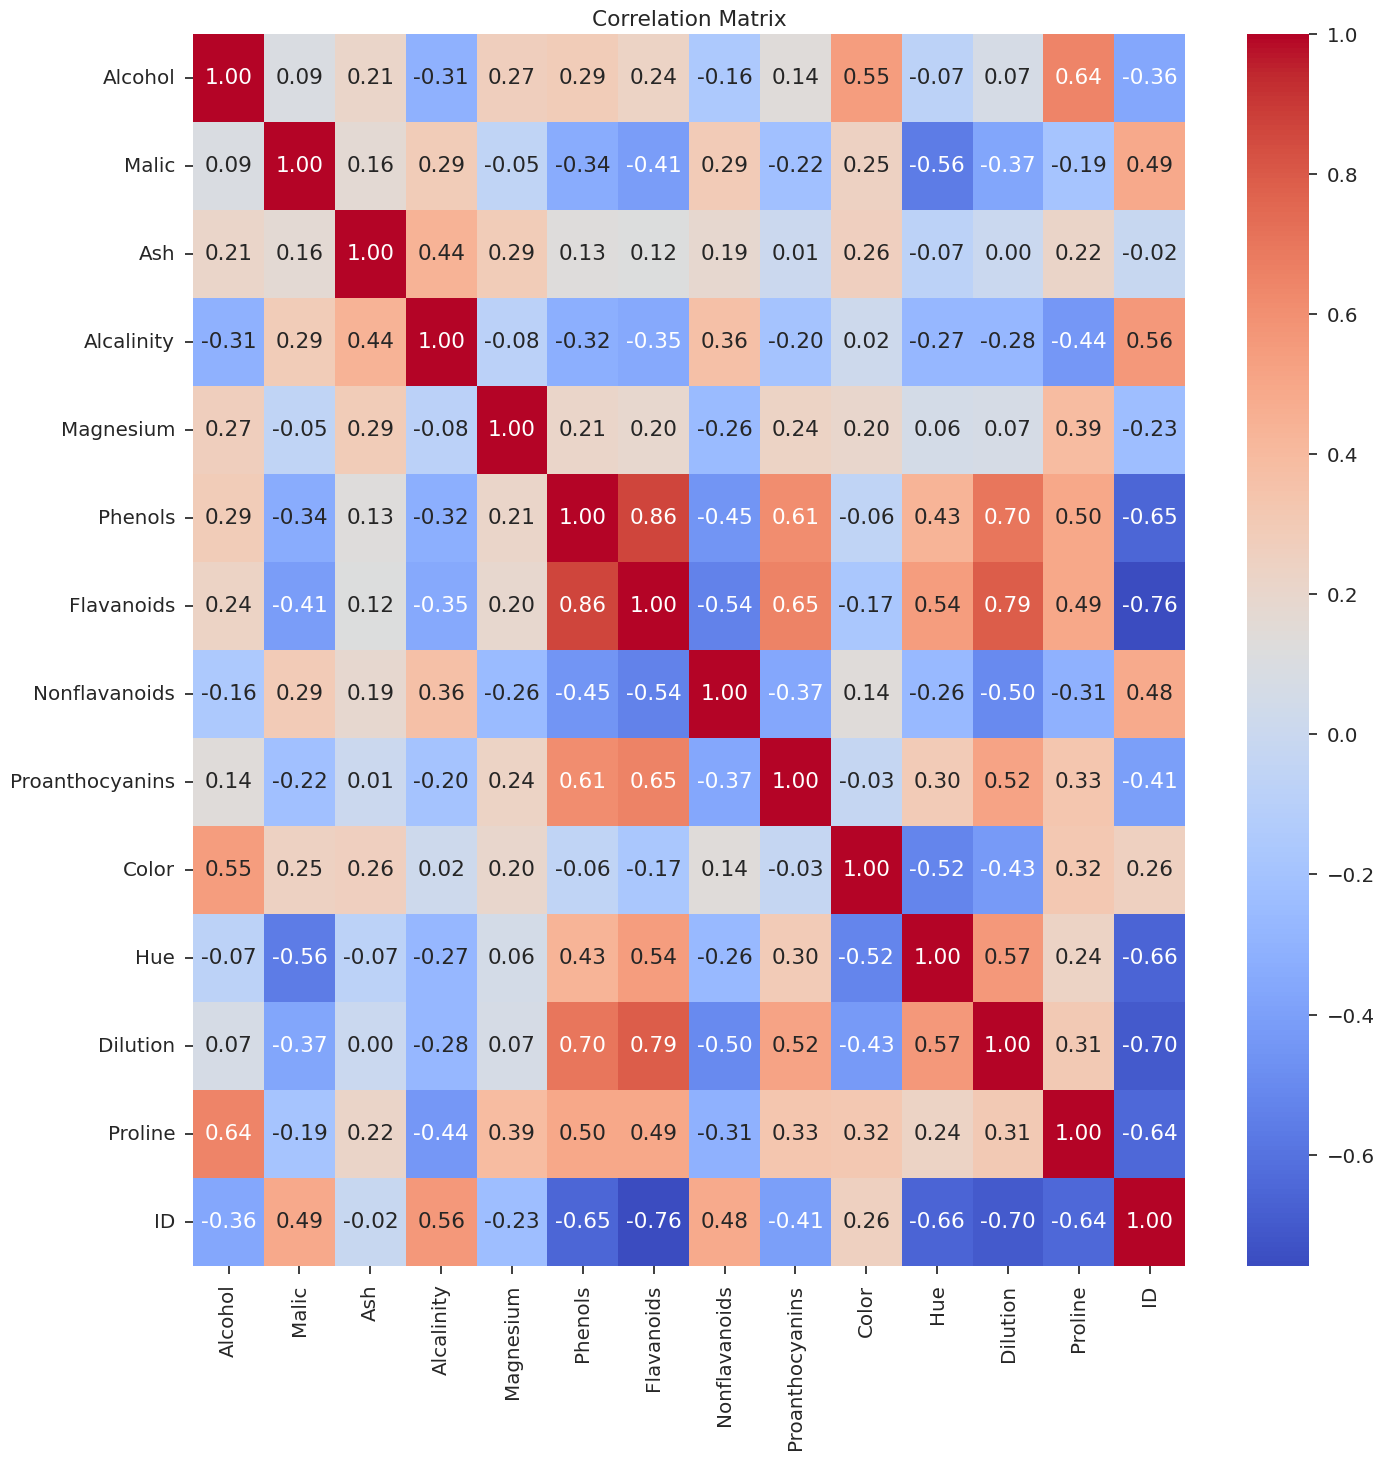

In [46]:
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Unique points in this correlation matrix:



*  Phenols is positively correlated with Flavanoids, Dilution and Proanthocyanins
*   Flavanoids is positively correlated with Proanthocyanins and Dilution

*  Dilution is positively correlated with Hue
*  Alcohol is positively correlated with Proline





In [53]:
import plotly.graph_objs as go
import plotly.io as pio
import pandas as pd

# Create a scatter plot
scatter = go.Scatter(x=df1['Phenols'], y=df1['Flavanoids'], mode='markers', marker=dict(color='blue'))

# Define layout
layout = go.Layout(
    title='Data represented by the 2 strongest positively Correlated features',
    xaxis=dict(title='Phenols'),
    yaxis=dict(title='Flavanoids')
)

# Create Plotly figure
fig = go.Figure(data=[scatter], layout=layout)

# Show interactive plot
pio.show(fig)


# Data Preprocessing

Standardizing Data

In [54]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df1)
std_df.shape

(178, 14)

MinMax Scaler

In [55]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df1)
minmax_df.shape

(178, 14)

PCA

In [59]:
pca_var = PCA()
pca_var.fit(std_df)

PCA()

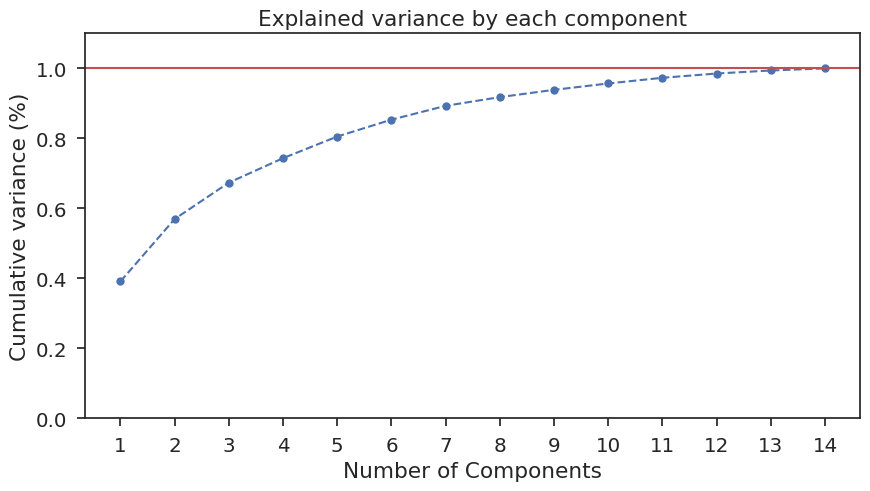

In [60]:
# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+std_df.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+std_df.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [61]:
# the amount of variance that each PCA explains is
var = pca_var.explained_variance_ratio_
var

array([0.39129819, 0.17835849, 0.10392085, 0.06990396, 0.06183992,
       0.04819035, 0.03948381, 0.02490743, 0.02078919, 0.01822808,
       0.01621756, 0.01222483, 0.00864803, 0.0059893 ])

Text(0.5, 1.0, 'Explained variance by each component')

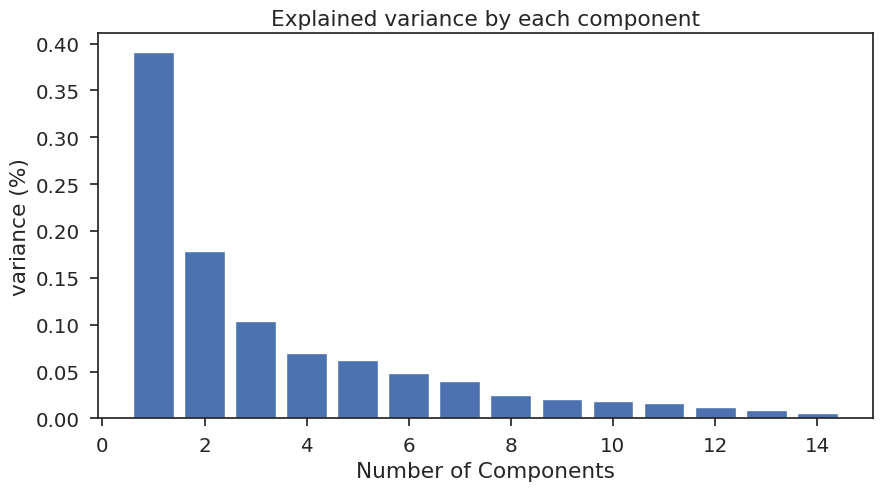

In [63]:
plt.figure(figsize=(10,5))
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [64]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([39.13, 56.97, 67.36, 74.35, 80.53, 85.35, 89.3 , 91.79, 93.87,
       95.69, 97.31, 98.53, 99.39, 99.99])

In [65]:
# PCA
pca = PCA(n_components=3)
pca_std = pca.fit_transform(std_df)

In [66]:
# Convert to data frame
pca_std_df = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3'])

In [67]:
# Shape and preview
print(pca_std_df.shape)
pca_std_df.head()

(178, 3)


PC1       PC2       PC3
0  3.723816 -1.447476 -0.153274
1  2.734987  0.334166 -2.079717
2  2.944840 -1.033583  0.979570
3  4.094144 -2.762344 -0.123541
4  1.550429 -0.867267  1.915570

PCA plot in 2D

Text(0, 0.5, 'PC2')

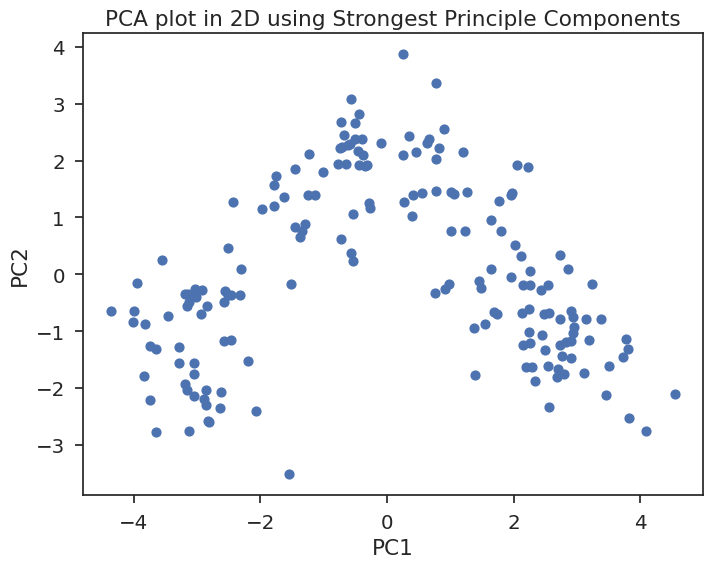

In [68]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

# PCA on MinMax Scaled Dataset

variance shows how much of the variance/spread of the data is captured in each dimension

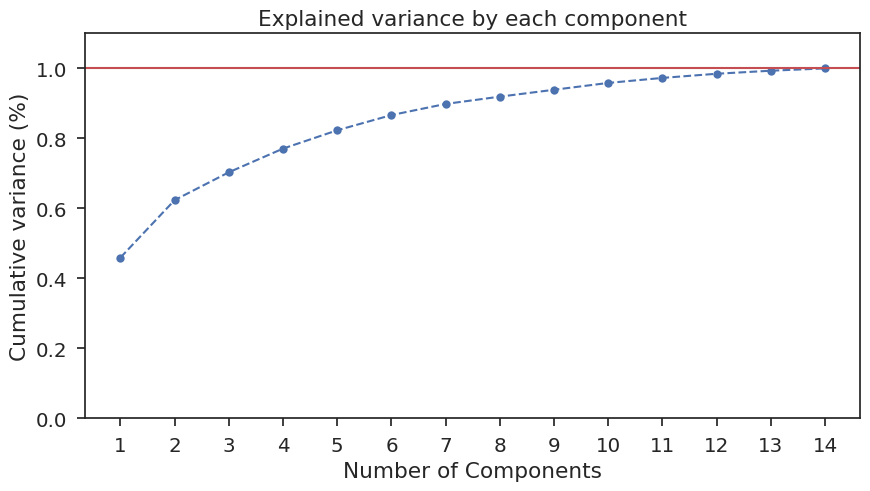

In [69]:
# PCA
pca_var = PCA()
pca_var.fit(minmax_df)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+minmax_df.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+minmax_df.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [70]:
# the amount of variance that each PCA explains is
var = pca_var.explained_variance_ratio_
var

array([0.459506  , 0.16420046, 0.07951977, 0.06762289, 0.05235124,
       0.04342315, 0.03180871, 0.02082412, 0.01966956, 0.01951889,
       0.01435926, 0.01185743, 0.0086919 , 0.0066466 ])

Text(0.5, 1.0, 'Explained variance by each component')

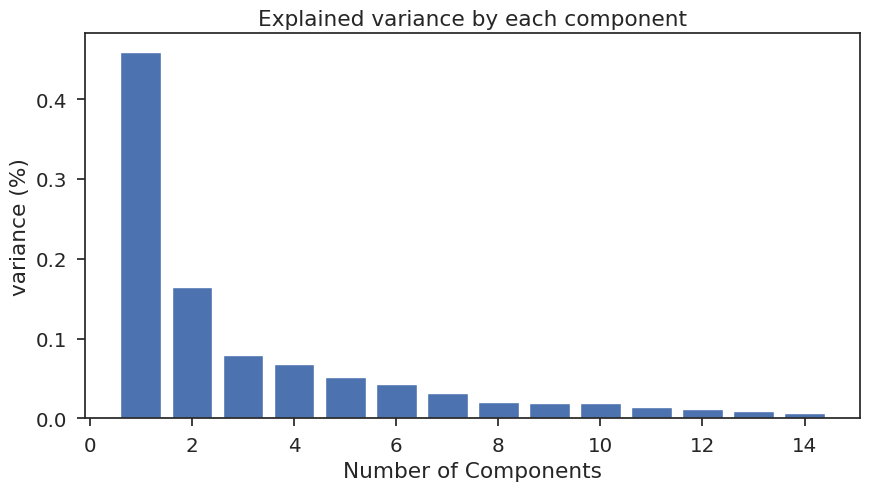

In [72]:
plt.figure(figsize=(10,5))
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [73]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 45.95,  62.37,  70.32,  77.08,  82.32,  86.66,  89.84,  91.92,
        93.89,  95.84,  97.28,  98.47,  99.34, 100.  ])

In [74]:
# PCA
pca = PCA(n_components=3)
pca_minmax = pca.fit_transform(minmax_df)

In [75]:
# Convert to data frame
pca_minmax_df = pd.DataFrame(data = pca_minmax, columns = ['PC1', 'PC2','PC3'])

In [76]:
# Shape and preview
print(pca_minmax_df.shape)
pca_minmax_df.head()

(178, 3)


PC1       PC2       PC3
0  0.864955 -0.246505  0.012715
1  0.676158 -0.011751 -0.306279
2  0.692172 -0.186686  0.139093
3  0.955057 -0.568299  0.123337
4  0.411640 -0.067685  0.118278

The new columns are called Principal Components (PC's) and give the coordinates of the data in the new smaller space

PCA plot in 2D

Text(0, 0.5, 'PC2')

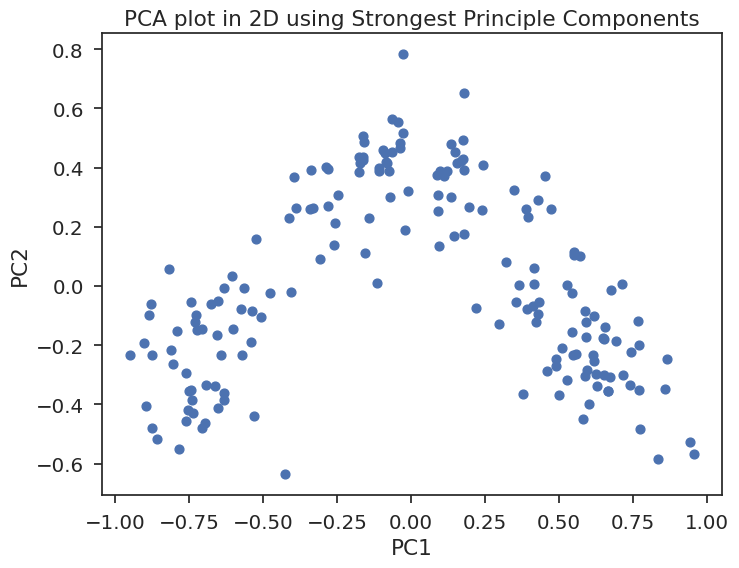

In [77]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

Notes:



*   Notice how these points have no colours (yet) because we don't know what their classes are. This is what makes it an unsupervised method.
*   We know our dataset falls naturally into 3 classes (3 types of wine), so we assign colours by clustering the data into 3 groups using techniques such as k-Means and Hierarchical.



# KMeans Clustering

# Elbow Method for Determining Cluster Amount on PCA Standard Scaled Dataset

In [78]:
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_std_df)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:01<00:00,  4.37it/s]


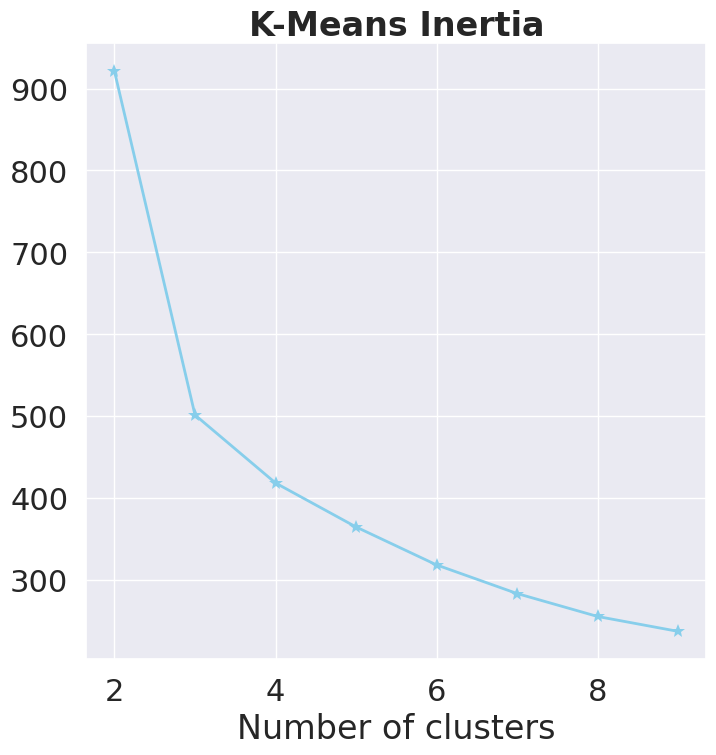

In [82]:
sns.set(style="darkgrid", rc={'figure.figsize':(8,8)}, font_scale=2)

plt.plot(range(2,len(inertia)+2), inertia, marker="*", lw=2, color="skyblue", ms=10)
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia", fontweight='bold')
plt.show()

There is a clearly visible "elbow" . A choice of 3 clusters seems to be fair

Build KMeans Cluster algorithm using K=3 and PCA on Standard Scaler Applied Dataset

In [83]:
# we have found good number of cluster = 3
# model building using cluster numbers = 3

model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_std_df)
y_predict_kmeans.shape

(178,)

In [84]:
# these are nothing but cluster labels...

y_predict_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [85]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [86]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[-3.00022931, -1.16059366, -0.23271123],
       [-0.08562687,  1.72743604,  0.24903744],
       [ 2.55325354, -0.9460415 , -0.08278602]])

In [87]:
model_kmeans.inertia_

501.17482400537745

In [89]:
#Assign clusters to the data set
df1['Kmeans_label'] = model_kmeans.labels_

In [90]:
# Group data by Clusters (K=6)
df1.groupby('Kmeans_label').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
                   mean      mean      mean       mean        mean      mean   
Kmeans_label                                                                   
0             13.144000  3.346200  2.425600  21.330000   98.640000  1.677200   
1             12.246418  1.891642  2.242985  20.140299   93.238806  2.258209   
2             13.711475  1.997049  2.453770  17.281967  107.786885  2.842131   

             Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  \
                   mean          mean            mean      mean      mean   
Kmeans_label                                                                
0              0.807000       0.45040        1.156400  7.264400  0.686200   
1              2.085672       0.36194        1.612836  3.059701  1.059493   
2              2.969180       0.28918        1.922951  5.444590  1.067705   

              Dilution      Proline          ID  
                  mean         mean        mean  
Kmeans_label                                     
0             1.698800   622.440000  152.380000  
1             2.798507   508.597015   95.104478  
2             3.154754  1110.639344   31.803279

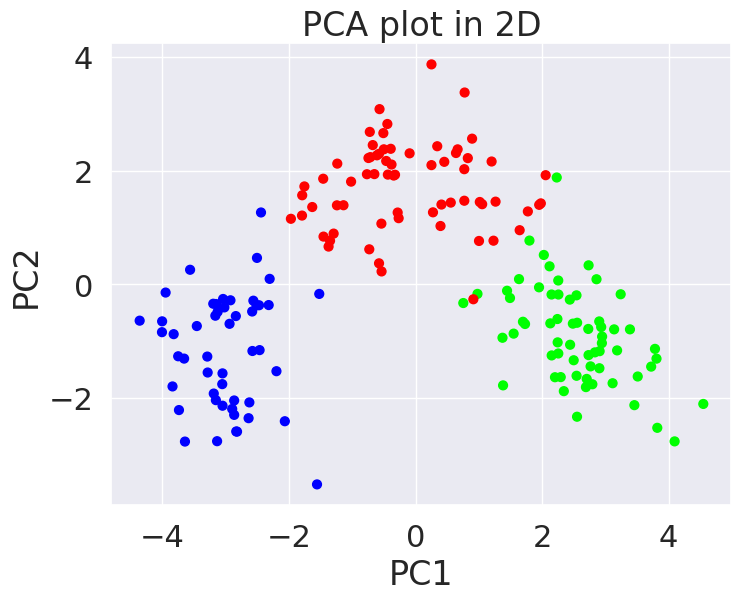

In [105]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=df1['Kmeans_label'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Elbow Method on PCA MinMaxScaler Applied Data

In [91]:
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_minmax_df)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 11.27it/s]


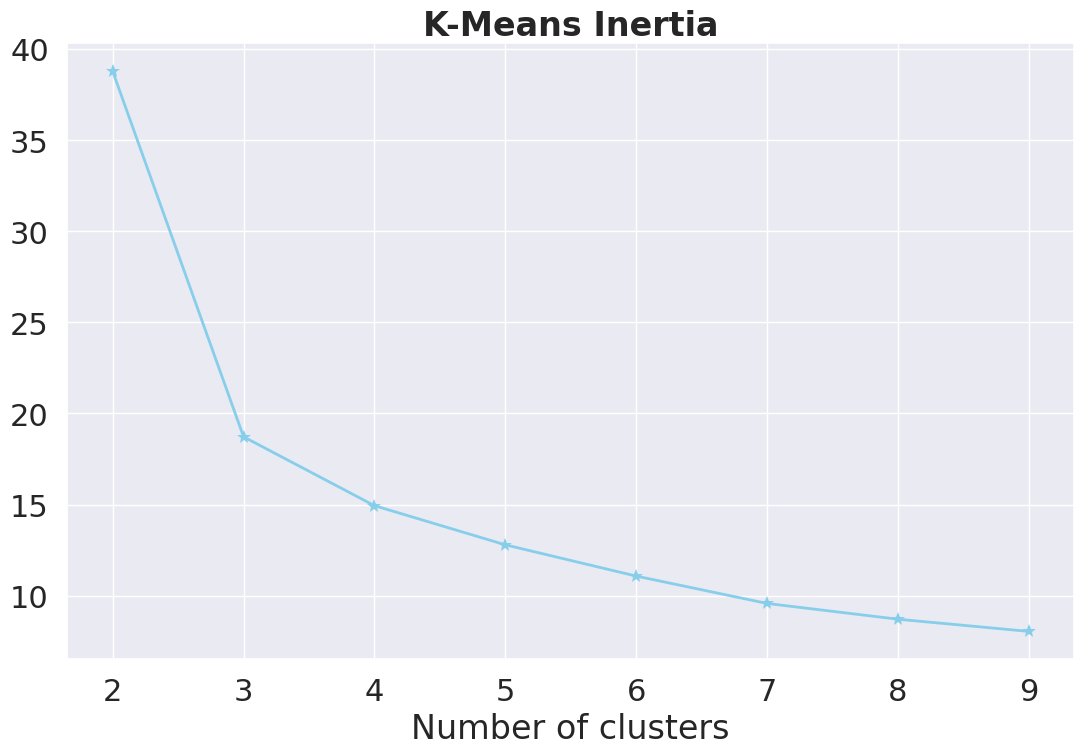

In [94]:
sns.set(style="darkgrid", rc={'figure.figsize':(13,8)}, font_scale=2)
plt.plot(range(2,len(inertia)+2), inertia, marker="*", lw=2, color="skyblue", ms=10)
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia", fontweight='bold')
plt.show()

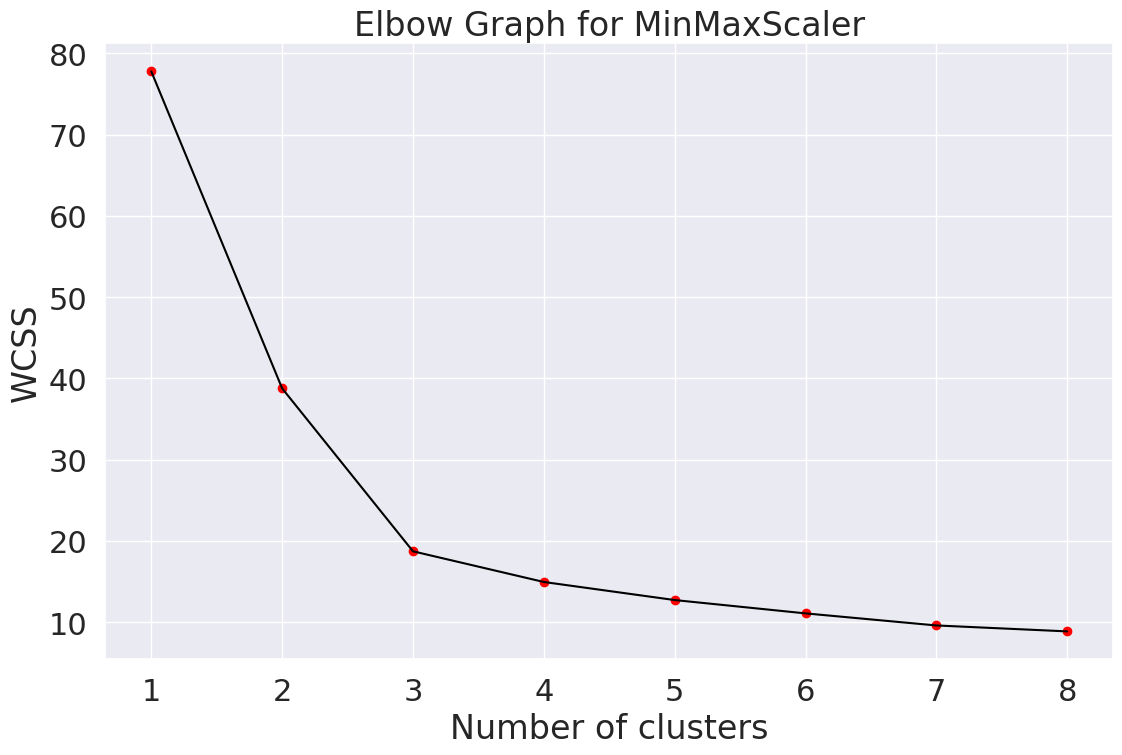

In [95]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(pca_minmax_df)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The PCA on MinMax Scaler Applied data, the ideal number of clusters is 3,

Build KMeans Cluster algorithm using K=3 and PCA on MinMaxScaler Applied Dataset

In [96]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_minmax_df)
y_predict_kmeans.shape

(178,)

In [97]:
y_predict_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [98]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [99]:
model_kmeans.cluster_centers_

array([[-0.69579292, -0.23298991,  0.00190367],
       [-0.02383121,  0.35770859,  0.01239953],
       [ 0.58649203, -0.19289148, -0.01473472]])

In [100]:
model_kmeans.inertia_

18.717061925694445

In [101]:
df1['Kmeans_label'] = model_kmeans.labels_

In [102]:
df1.groupby('Kmeans_label').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
                   mean      mean      mean       mean        mean      mean   
Kmeans_label                                                                   
0             13.144000  3.346200  2.425600  21.330000   98.640000  1.677200   
1             12.233333  1.905000  2.251212  20.218182   93.469697  2.247273   
2             13.701774  1.981129  2.441613  17.245161  107.306452  2.844355   

             Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  \
                   mean          mean            mean      mean      mean   
Kmeans_label                                                                
0              0.807000      0.450400        1.156400  7.264400  0.686200   
1              2.069091      0.363485        1.602727  3.025758  1.058576   
2              2.972581      0.288710        1.928710  5.442258  1.068548   

              Dilution      Proline          ID  
                  mean         mean        mean  
Kmeans_label                                     
0             1.698800   622.440000  152.380000  
1             2.792727   508.696970   95.530303  
2             3.155161  1100.822581   32.370968

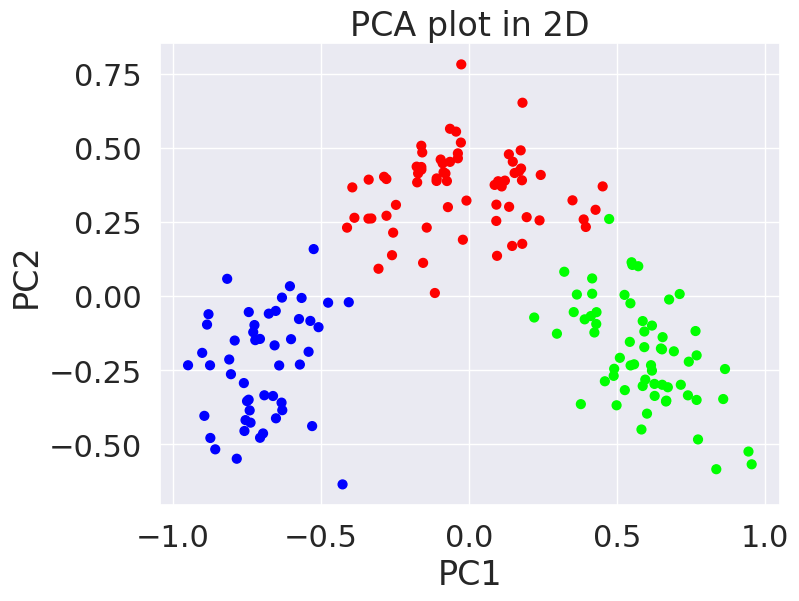

In [104]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=df1['Kmeans_label'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

We can now clearly see the 3 number of clusters formed

In [107]:
# Sorting elements based on cluster label assigned and taking average for insights.
df1 = df1.copy()
df1['Cluster'] = model_kmeans.labels_

cluster1 = pd.DataFrame(df1.loc[df1.Cluster==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df1.loc[df1.Cluster==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(df1.loc[df1.Cluster==2].mean(),columns= ['Cluster2_avg'])

In [108]:
avg_df = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_df

Cluster1_avg  Cluster2_avg  Cluster2_avg
Alcohol               13.1440     12.233333     13.701774
Malic                  3.3462      1.905000      1.981129
Ash                    2.4256      2.251212      2.441613
Alcalinity            21.3300     20.218182     17.245161
Magnesium             98.6400     93.469697    107.306452
Phenols                1.6772      2.247273      2.844355
Flavanoids             0.8070      2.069091      2.972581
Nonflavanoids          0.4504      0.363485      0.288710
Proanthocyanins        1.1564      1.602727      1.928710
Color                  7.2644      3.025758      5.442258
Hue                    0.6862      1.058576      1.068548
Dilution               1.6988      2.792727      3.155161
Proline              622.4400    508.696970   1100.822581
ID                   152.3800     95.530303     32.370968
Kmeans_label           0.0000      1.000000      2.000000
Cluster                0.0000      1.000000      2.000000

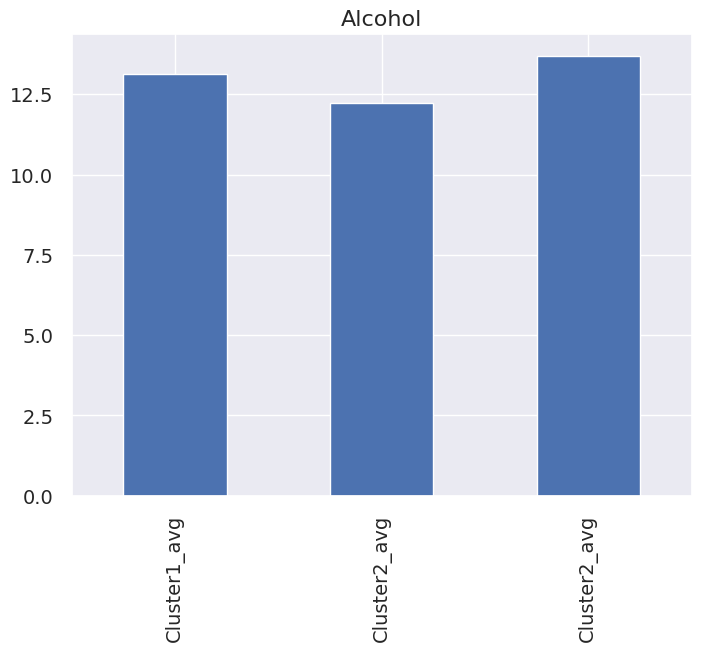

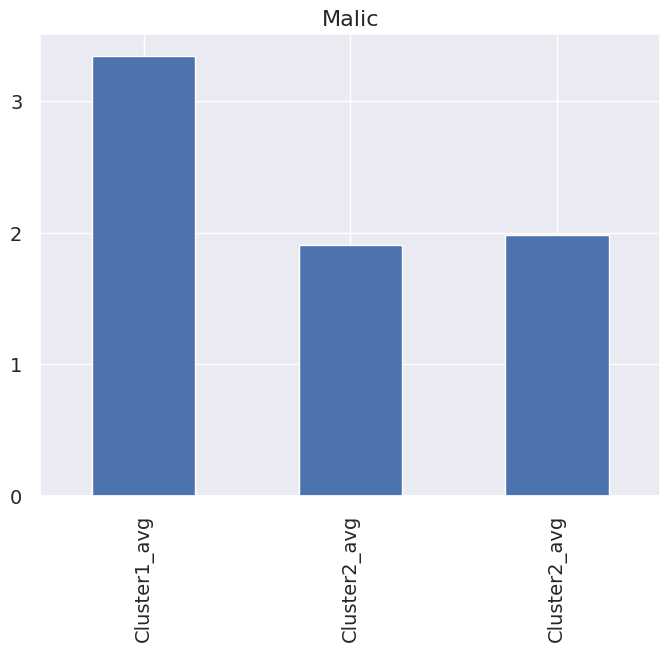

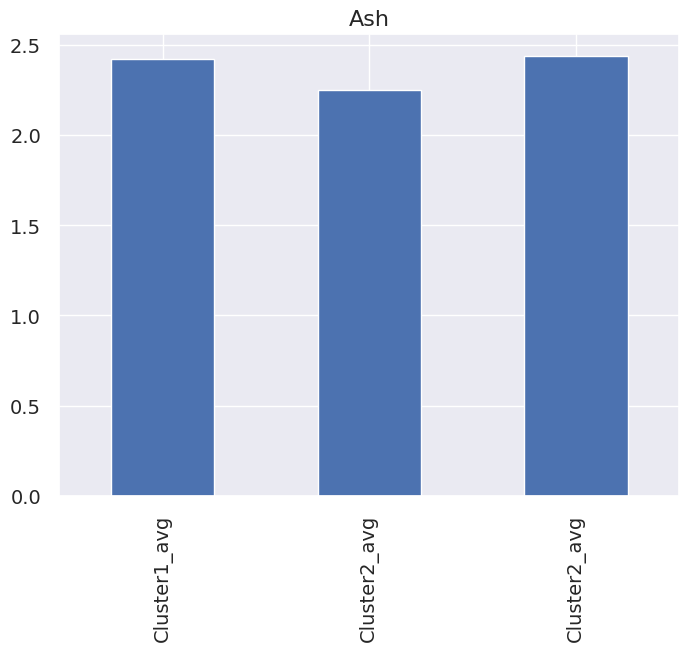

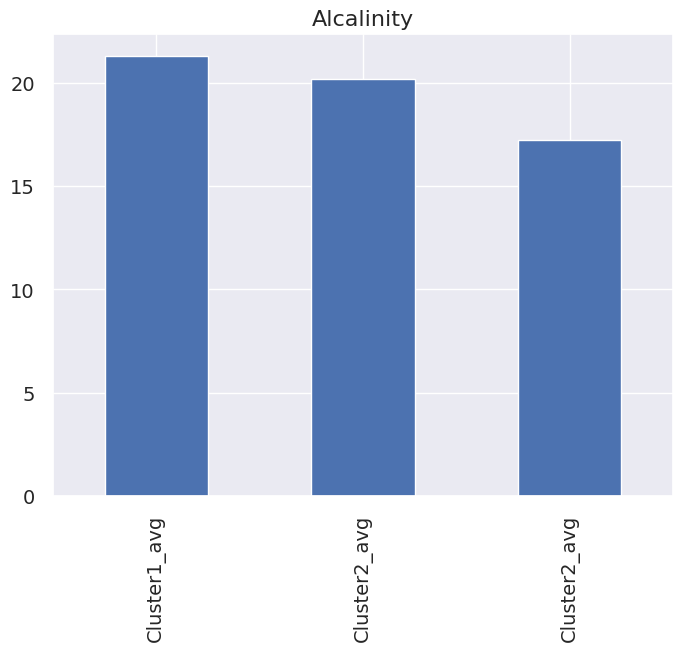

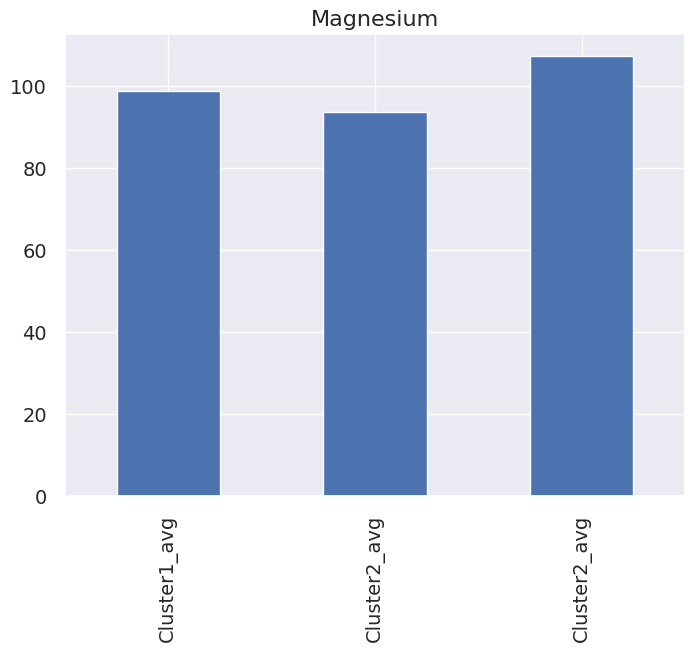

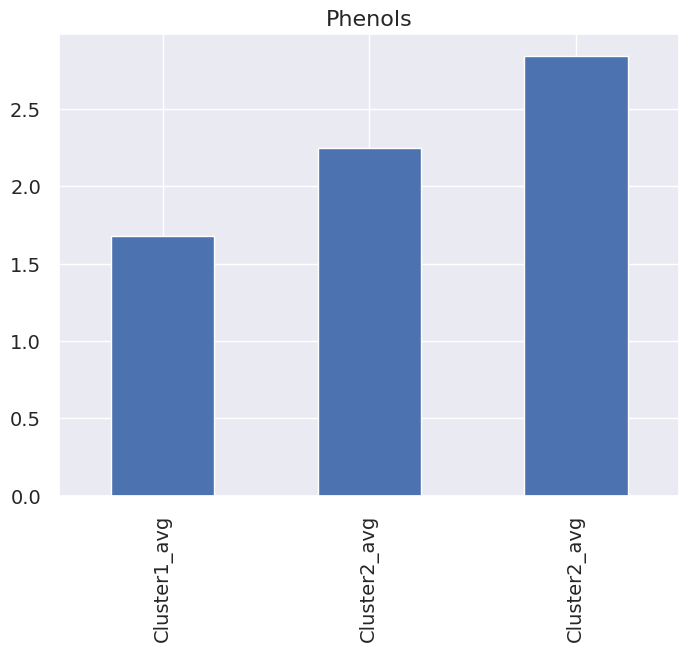

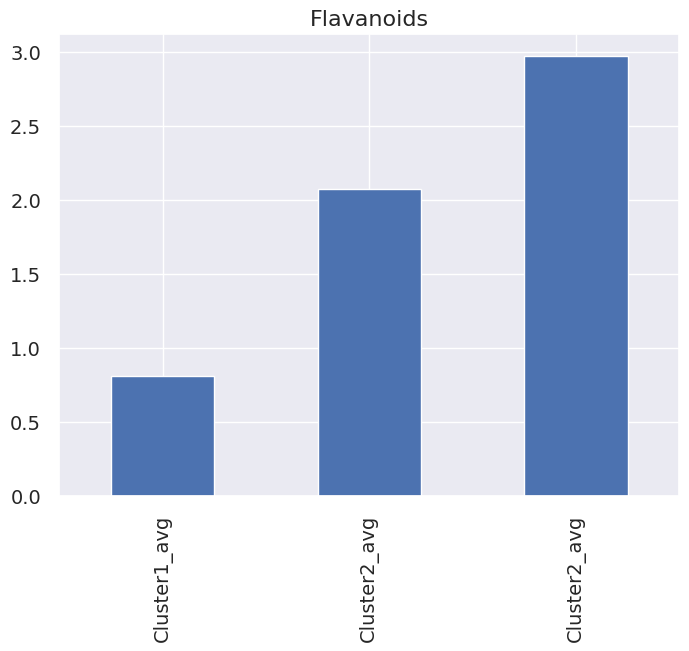

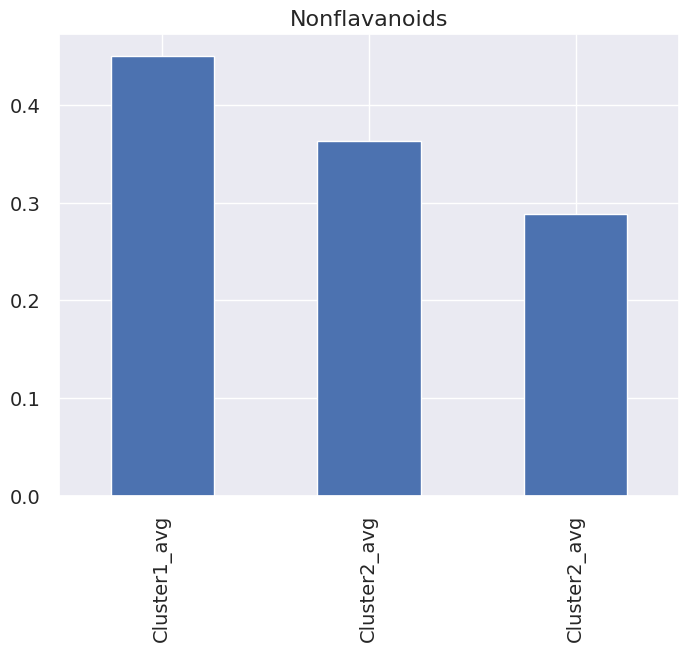

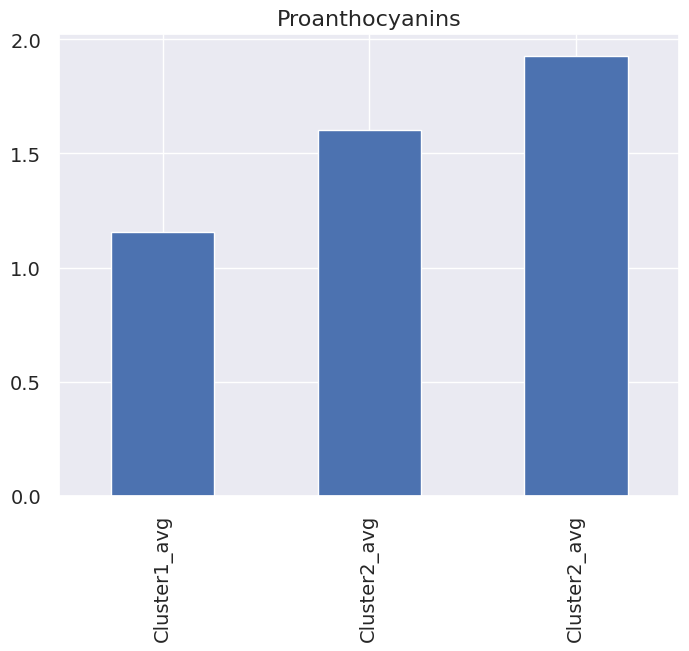

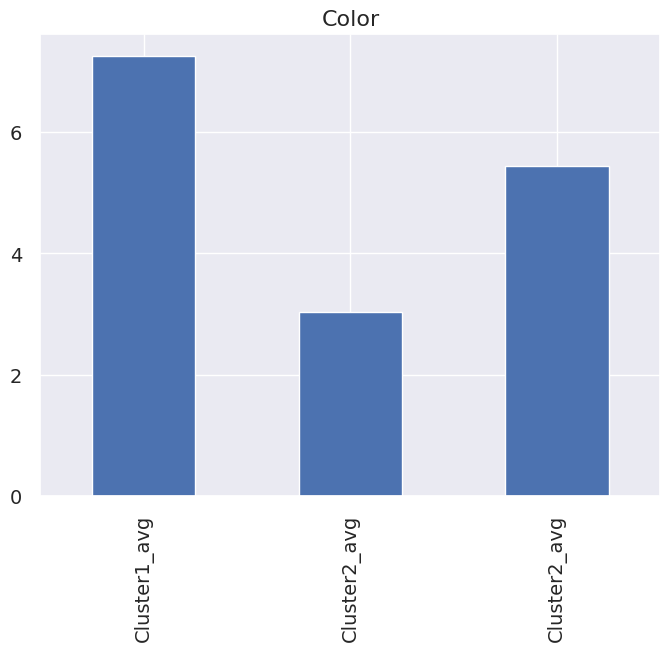

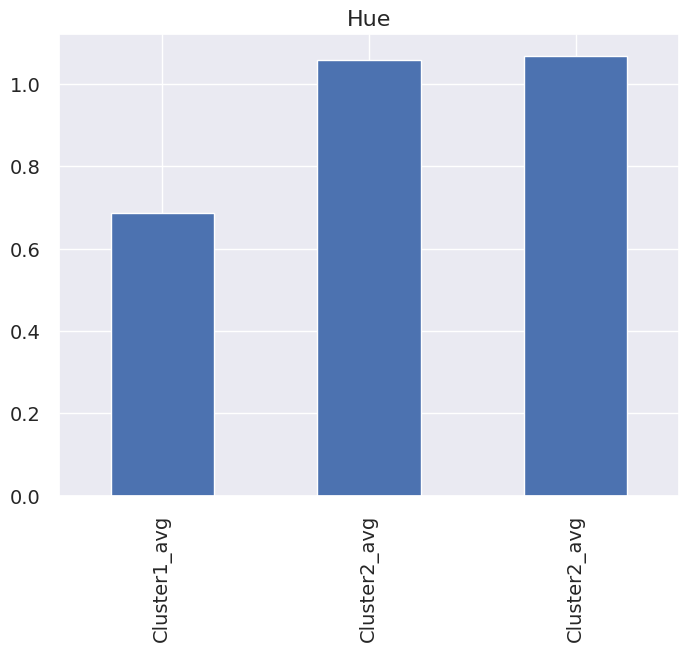

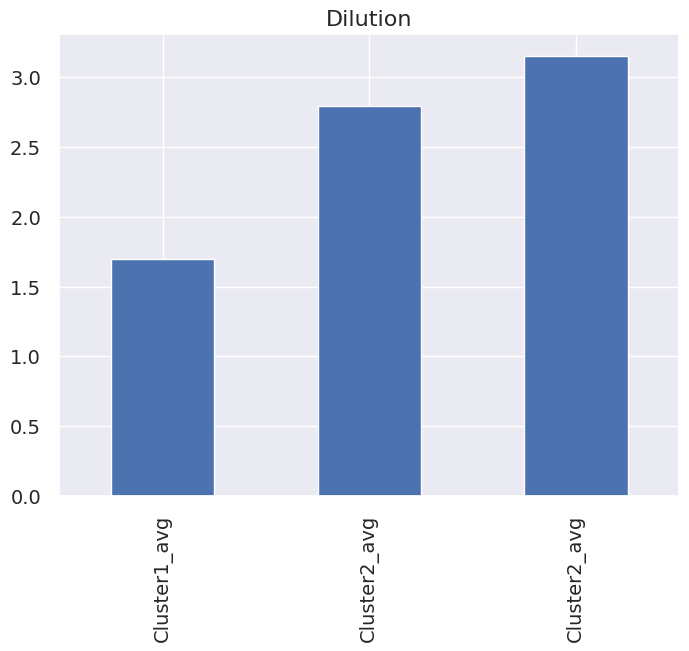

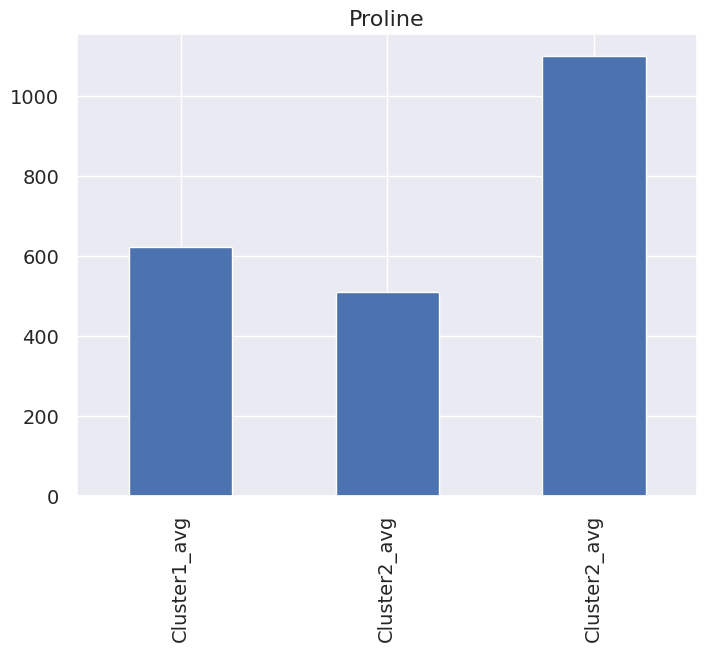

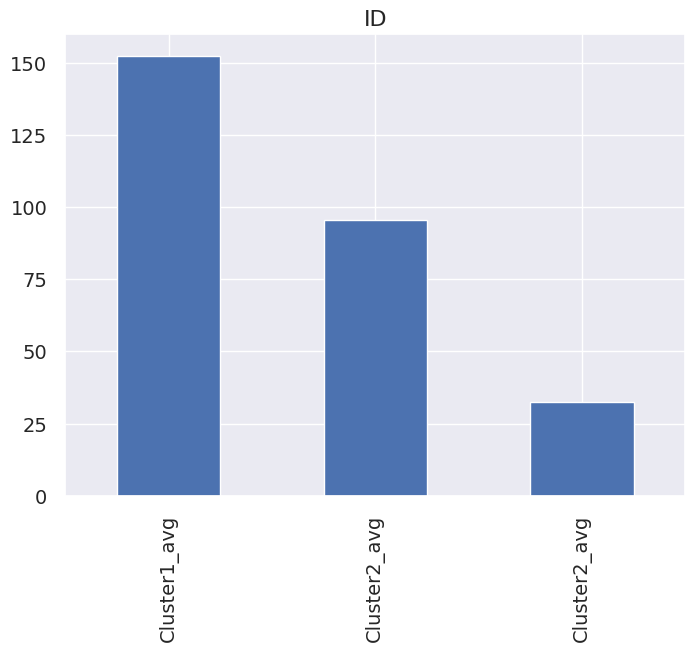

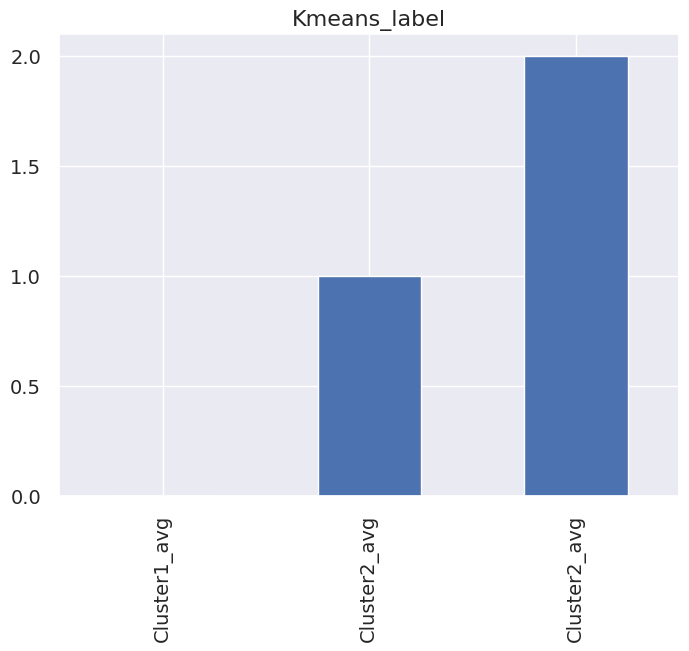

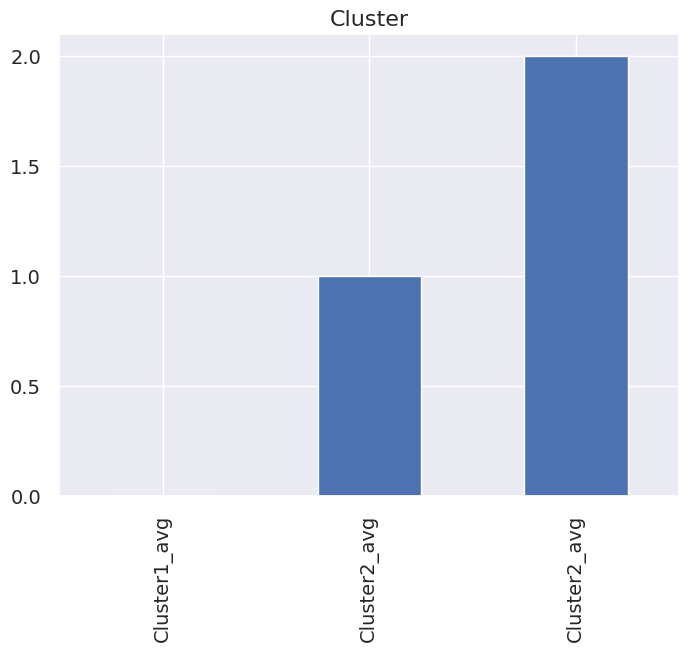

In [109]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

# Hierarchical Clustering Algorithm

Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.

Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding.

Ward method is commanly used since it is simpler to visualize understanding.

Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

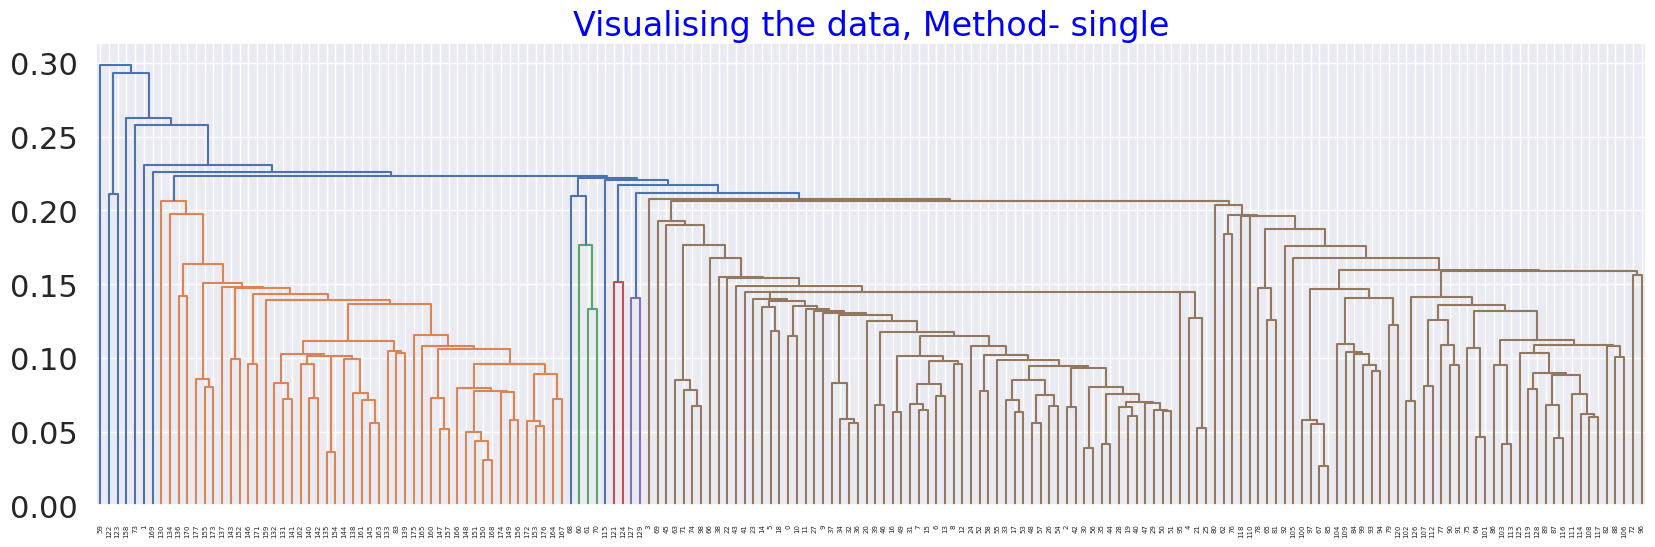

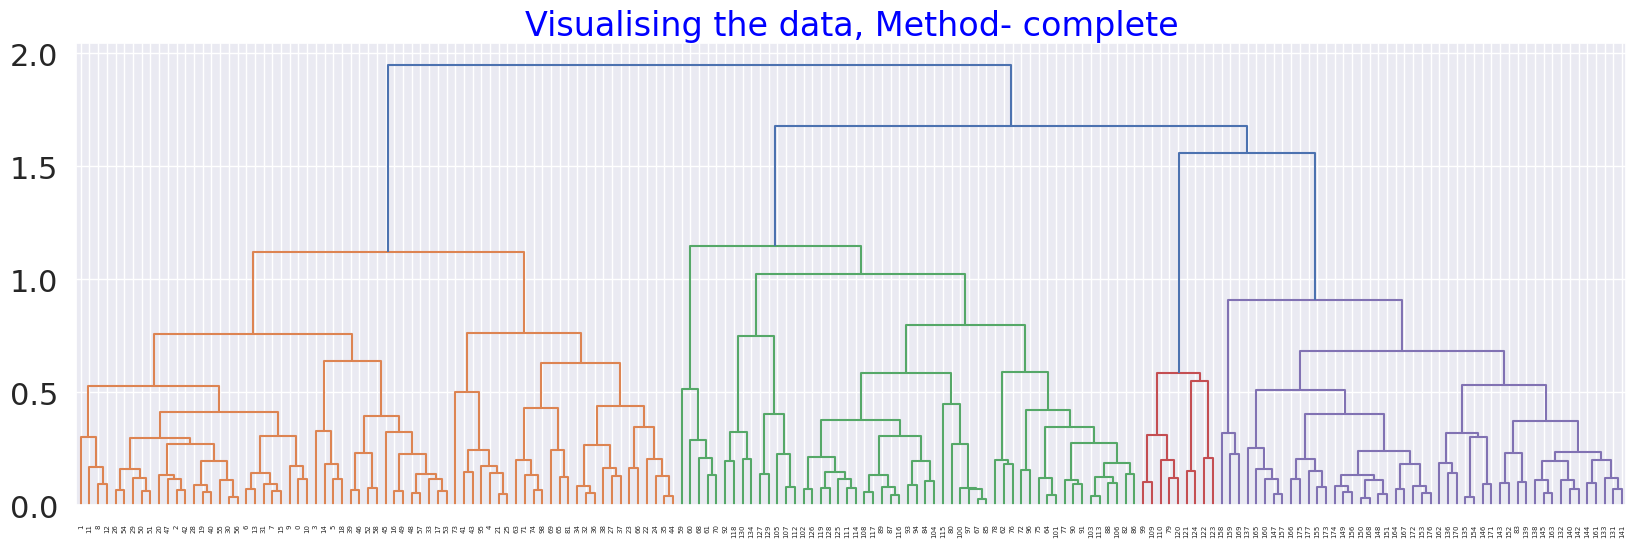

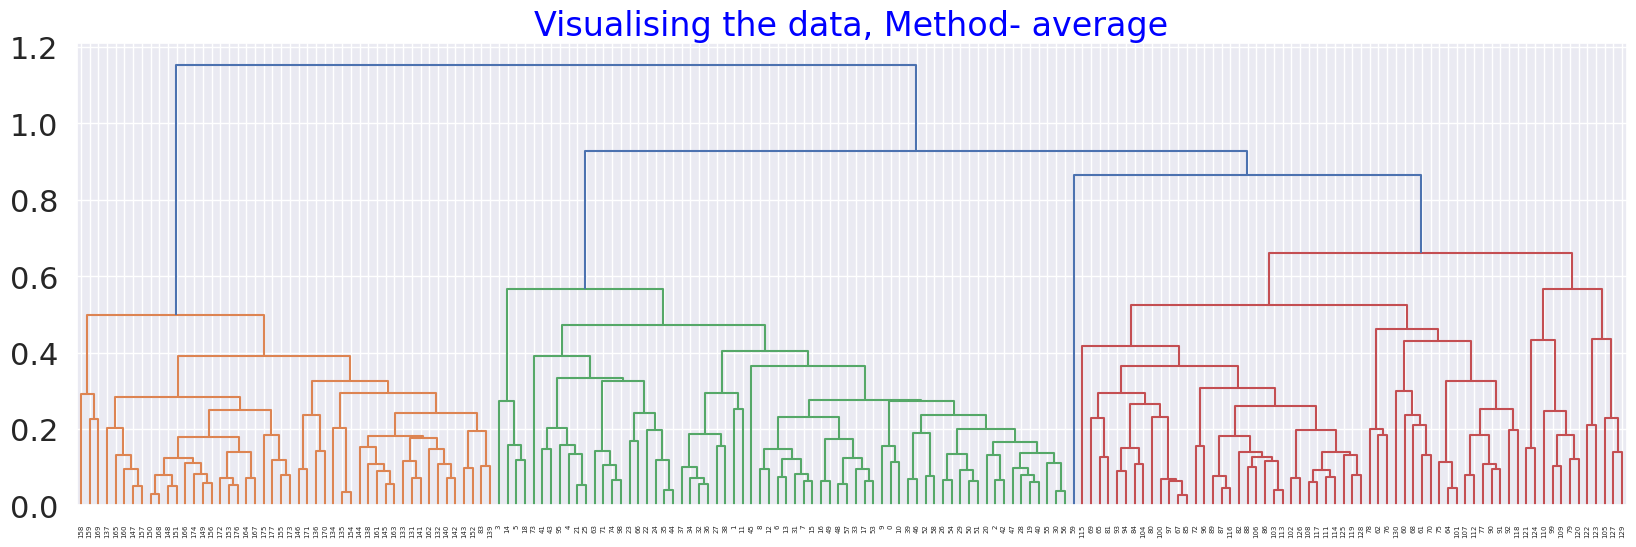

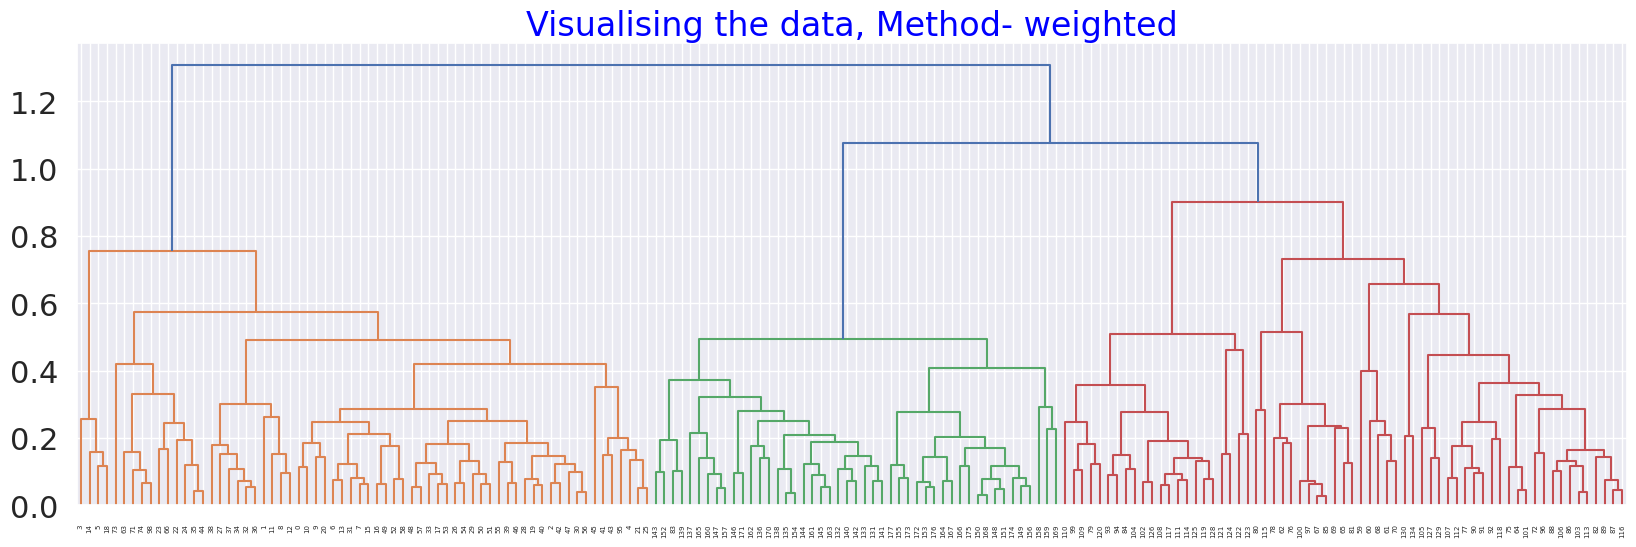

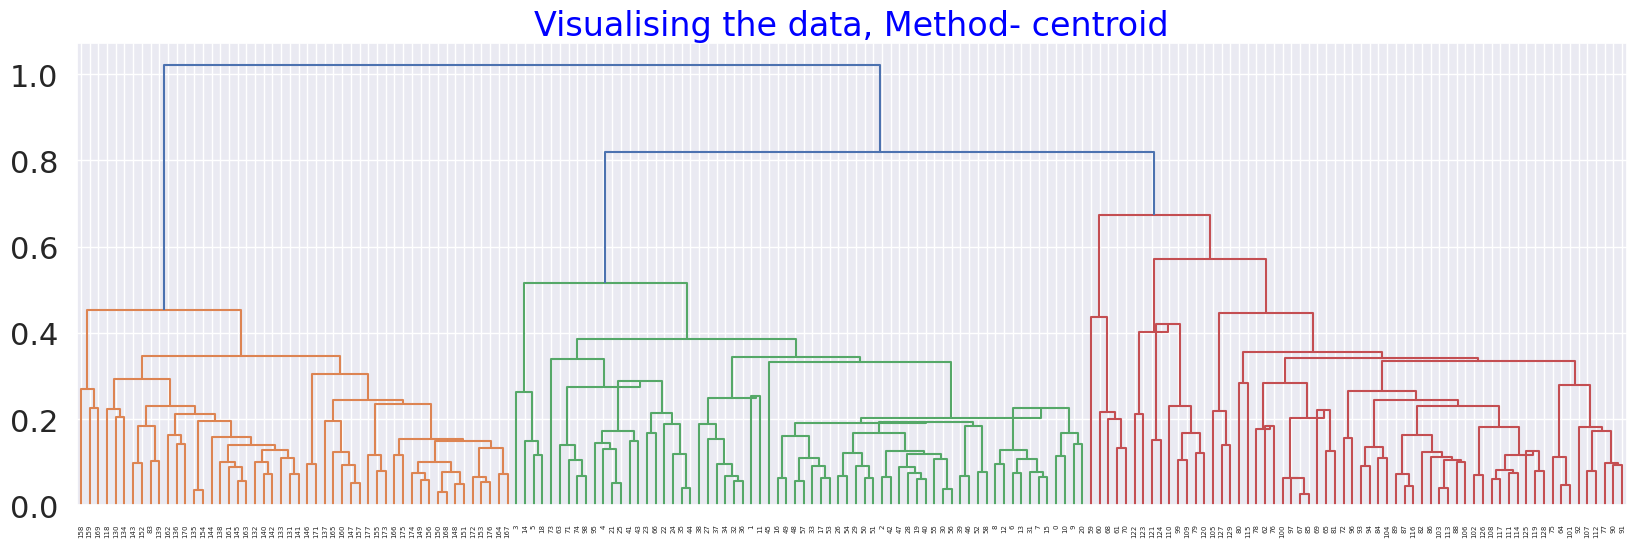

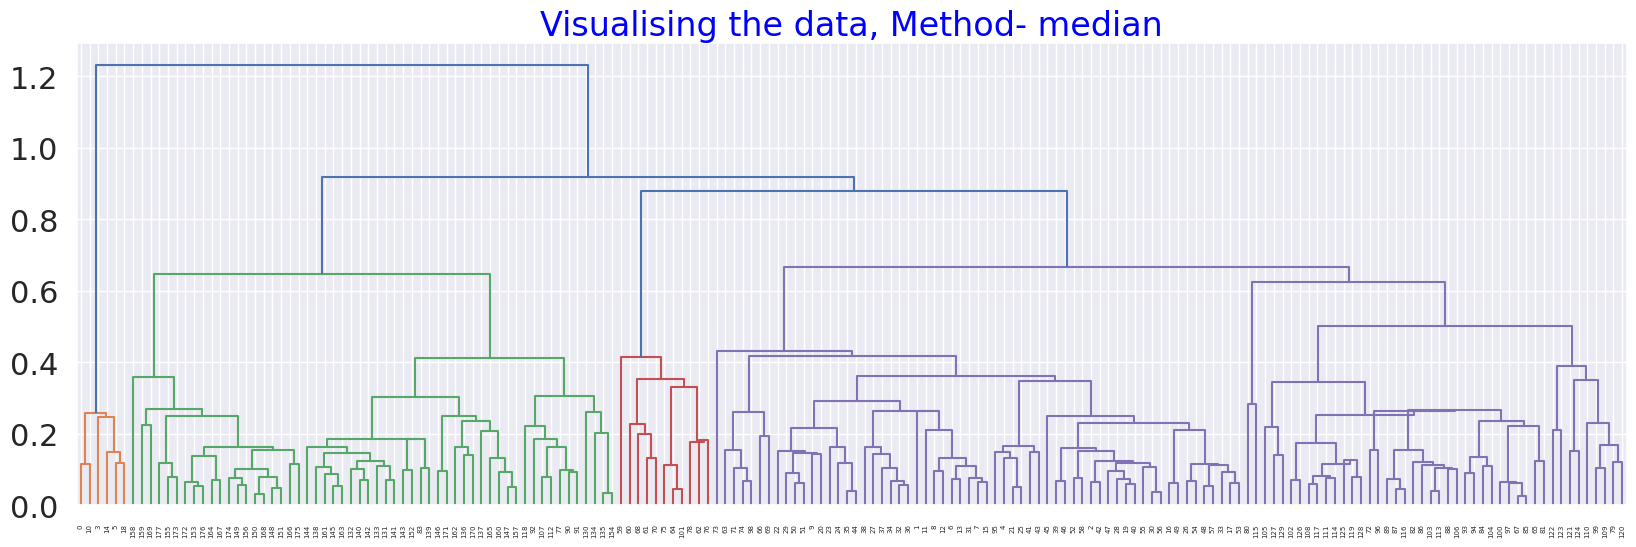

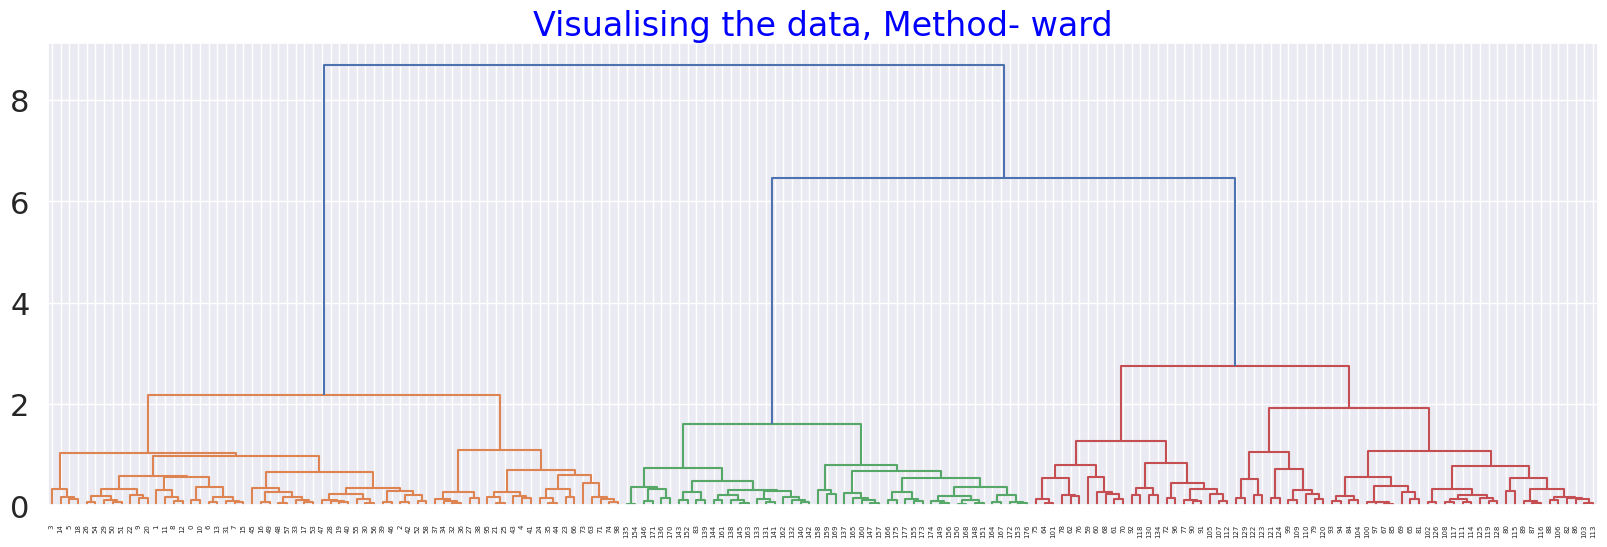

In [110]:
for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize =(20, 6))

    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}

    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict)
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_minmax_df, method = methods,optimal_ordering=False))

## Run Hierarchical Clustering.(Agglomerative Clustering) For PCA on Standard Scaled Data

In [112]:
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='l1')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [113]:
agg_clustering.n_clusters_

4

In [114]:
(sil(pca_std_df, agg_clustering.labels_)*100).round(3)

47.312

Putting Cluster lables into original dataset And analysis of the same

In [115]:
df1['Hierarchical_labels'] = agg_clustering.labels_
df1.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  ID  \
0           0.28             2.29   5.64  1.04      3.92     1065   1   
1           0.26             1.28   4.38  1.05      3.40     1050   2   
2           0.30             2.81   5.68  1.03      3.17     1185   3   
3           0.24             2.18   7.80  0.86      3.45     1480   4   
4           0.39             1.82   4.32  1.04      2.93      735   5   

   Kmeans_label  Cluster  Hierarchical_labels  
0             2        2                    1  
1             2        2                    1  
2             2        2                    1  
3             2        2                    1  
4             2        2                    1

In [116]:
df1.groupby('Hierarchical_labels').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium  \
                          mean      mean      mean       mean        mean   
Hierarchical_labels                                                         
0                    12.249516  1.972097  2.249839  20.193548   92.000000   
1                    13.622615  1.927692  2.395692  16.955385  106.738462   
2                    13.157708  3.386042  2.437083  21.510417   98.541667   
3                    12.533333  1.923333  3.016667  27.833333  127.333333   

                      Phenols Flavanoids Nonflavanoids Proanthocyanins  \
                         mean       mean          mean            mean   
Hierarchical_labels                                                      
0                    2.182419   1.959194      0.370645        1.529516   
1                    2.821385   2.942154      0.283077        1.946923   
2                    1.681667   0.788542      0.455833        1.167708   
3                    3.036667   3.550000      0.383333        1.916667   

                        Color       Hue  Dilution      Proline          ID  \
                         mean      mean      mean         mean        mean   
Hierarchical_labels                                                          
0                    2.937097  1.042516  2.740000   497.564516   97.403226   
1                    5.378308  1.070308  3.124308  1072.276923   35.400000   
2                    7.410833  0.684375  1.698542   627.500000  153.520833   
3                    4.310000  1.123333  3.463333   760.000000   74.000000   

                    Kmeans_label   Cluster  
                            mean      mean  
Hierarchical_labels                         
0                       0.967742  0.967742  
1                       1.923077  1.923077  
2                       0.000000  0.000000  
3                       1.666667  1.666667

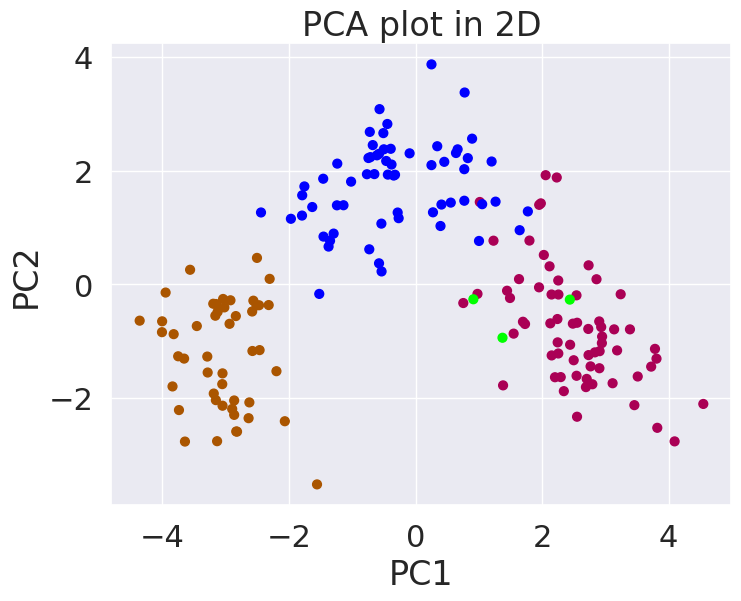

In [121]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=df1['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Run Hierarchical Clustering.(Agglomerative Clustering) For PCA on MinMaxScaled Data

In [122]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='l2')
y_pred_hie = agg_clustering.fit_predict(pca_minmax_df)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [123]:
agg_clustering.n_clusters_

3

In [124]:
(sil(pca_minmax_df, agg_clustering.labels_)*100).round(3)

51.639

In [125]:
df1['Hierarchical_labels'] = agg_clustering.labels_
df1.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  ID  \
0           0.28             2.29   5.64  1.04      3.92     1065   1   
1           0.26             1.28   4.38  1.05      3.40     1050   2   
2           0.30             2.81   5.68  1.03      3.17     1185   3   
3           0.24             2.18   7.80  0.86      3.45     1480   4   
4           0.39             1.82   4.32  1.04      2.93      735   5   

   Kmeans_label  Cluster  Hierarchical_labels  
0             2        2                    2  
1             2        2                    2  
2             2        2                    2  
3             2        2                    2  
4             2        2                    2

In [126]:
df1.groupby('Hierarchical_labels').agg(['mean'])

Alcohol     Malic       Ash Alcalinity   Magnesium  \
                          mean      mean      mean       mean        mean   
Hierarchical_labels                                                         
0                    12.226094  1.964219  2.244531  20.076563   93.890625   
1                    13.157708  3.386042  2.437083  21.510417   98.541667   
2                    13.637424  1.933788  2.433485  17.465152  106.287879   

                      Phenols Flavanoids Nonflavanoids Proanthocyanins  \
                         mean       mean          mean            mean   
Hierarchical_labels                                                      
0                    2.157969   1.987656      0.372812        1.565781   
1                    1.681667   0.788542      0.455833        1.167708   
2                    2.874242   2.971970      0.282879        1.923030   

                        Color       Hue  Dilution      Proline          ID  \
                         mean      mean      mean         mean        mean   
Hierarchical_labels                                                          
0                    2.994687  1.042437  2.746875   503.125000   97.578125   
1                    7.410833  0.684375  1.698542   627.500000  153.520833   
2                    5.347879  1.073636  3.144697  1070.106061   35.106061   

                    Kmeans_label   Cluster  
                            mean      mean  
Hierarchical_labels                         
0                       0.968750  0.968750  
1                       0.000000  0.000000  
2                       1.939394  1.939394

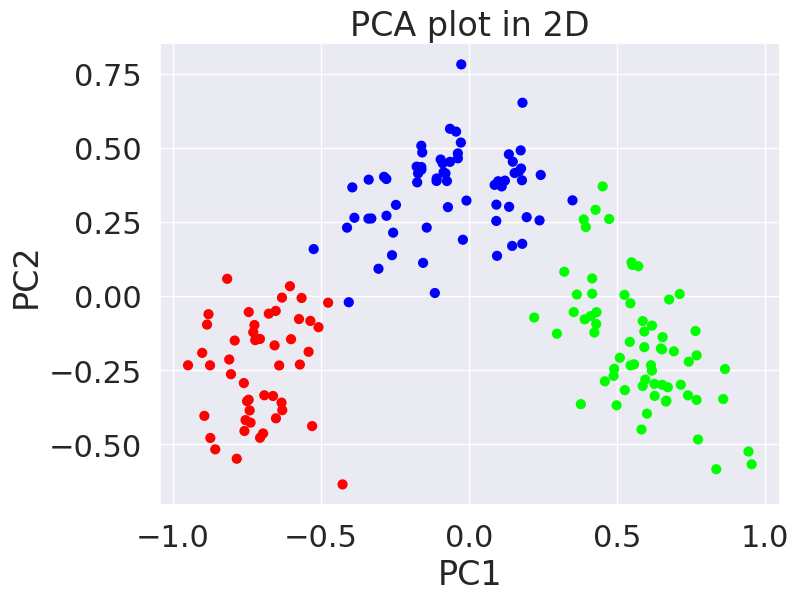

In [128]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=df1['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [129]:
cluster1 = pd.DataFrame(df1.loc[df1.Cluster==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df1.loc[df1.Cluster==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(df1.loc[df1.Cluster==2].mean(),columns= ['Cluster2_avg'])

In [130]:
avg_df = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_df

Cluster1_avg  Cluster2_avg  Cluster2_avg
Alcohol                   13.1440     12.233333     13.701774
Malic                      3.3462      1.905000      1.981129
Ash                        2.4256      2.251212      2.441613
Alcalinity                21.3300     20.218182     17.245161
Magnesium                 98.6400     93.469697    107.306452
Phenols                    1.6772      2.247273      2.844355
Flavanoids                 0.8070      2.069091      2.972581
Nonflavanoids              0.4504      0.363485      0.288710
Proanthocyanins            1.1564      1.602727      1.928710
Color                      7.2644      3.025758      5.442258
Hue                        0.6862      1.058576      1.068548
Dilution                   1.6988      2.792727      3.155161
Proline                  622.4400    508.696970   1100.822581
ID                       152.3800     95.530303     32.370968
Kmeans_label               0.0000      1.000000      2.000000
Cluster                    0.0000      1.000000      2.000000
Hierarchical_labels        0.9600      0.121212      2.000000

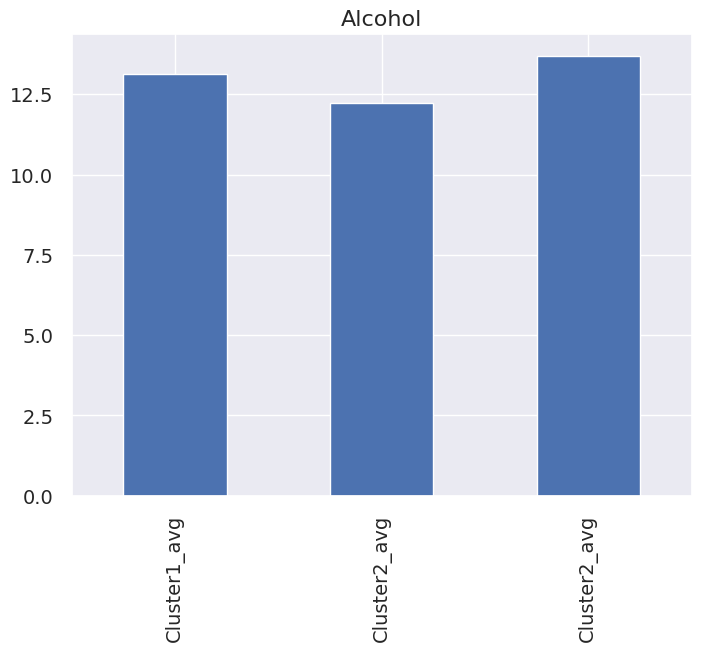

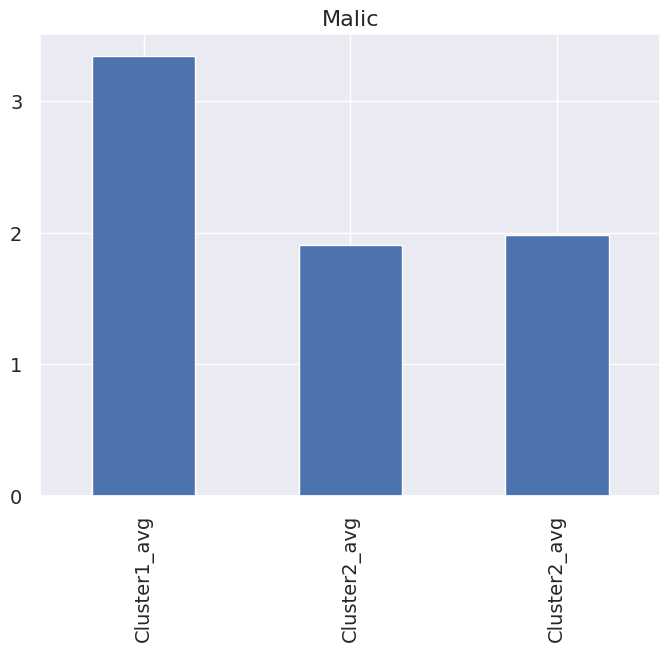

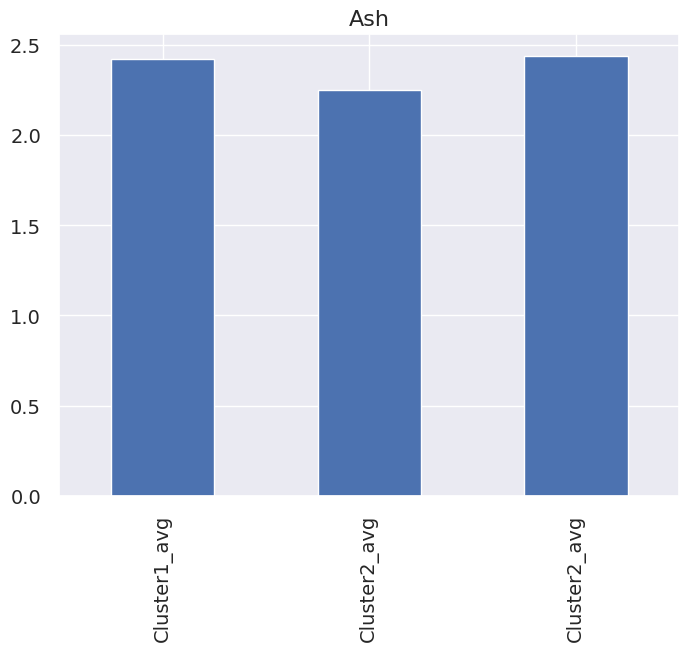

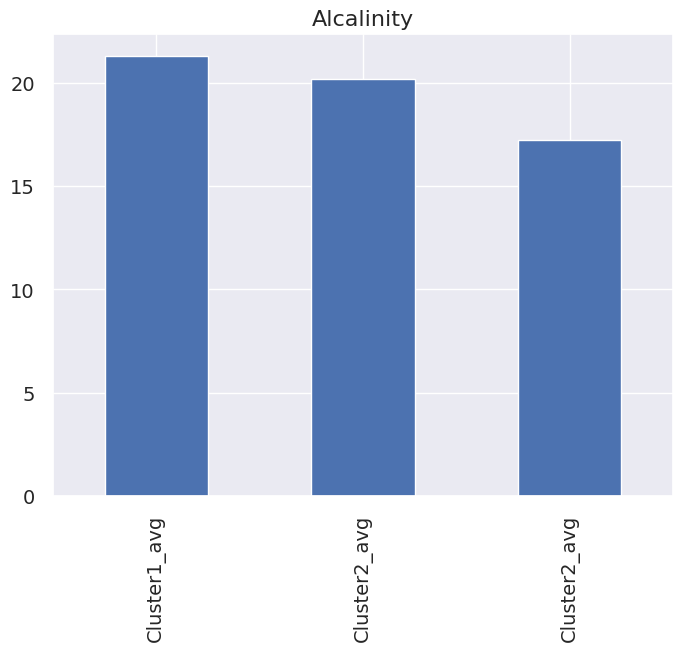

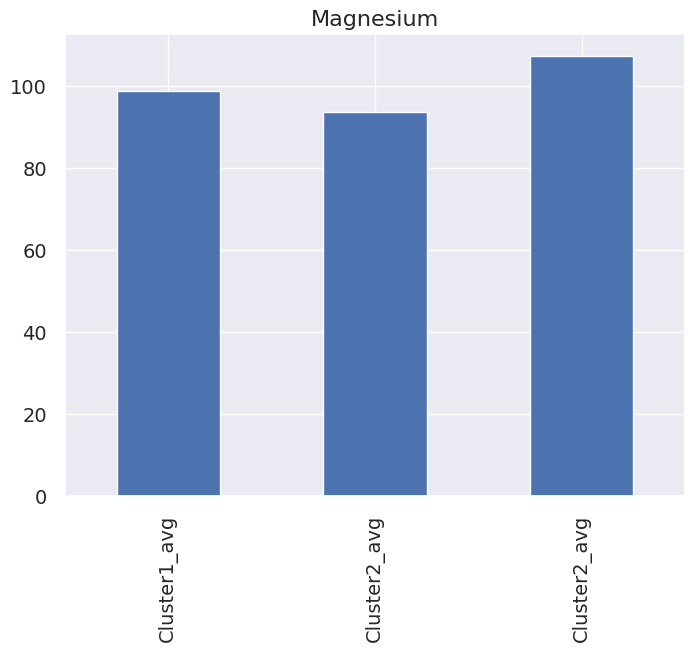

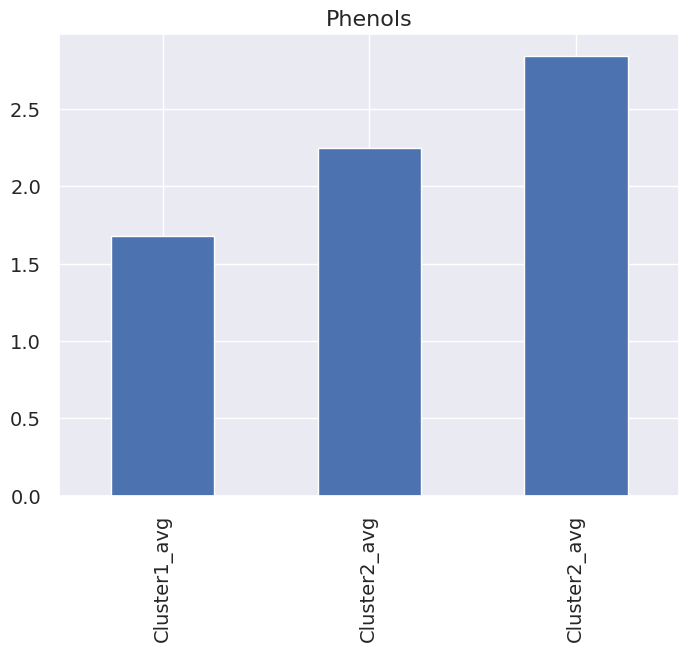

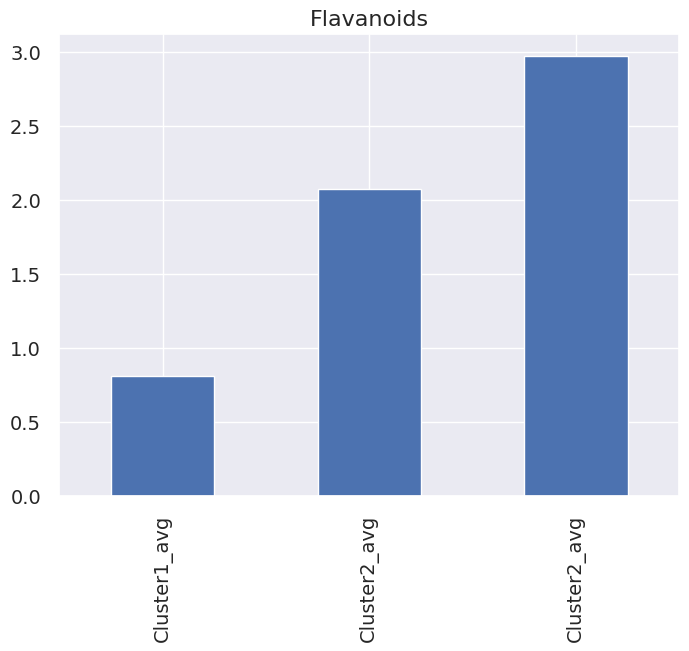

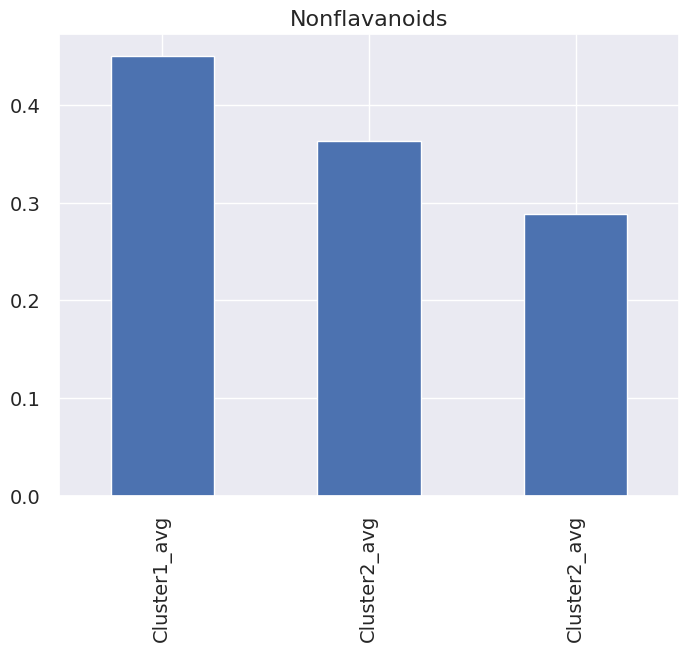

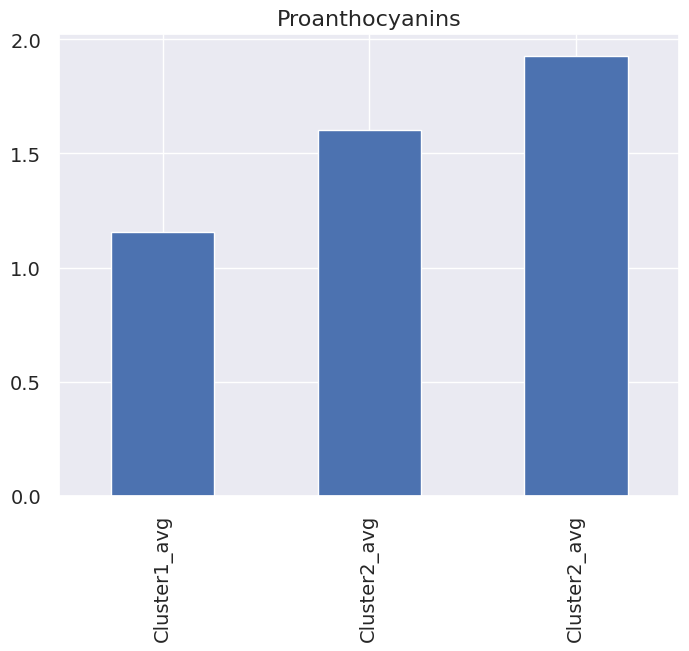

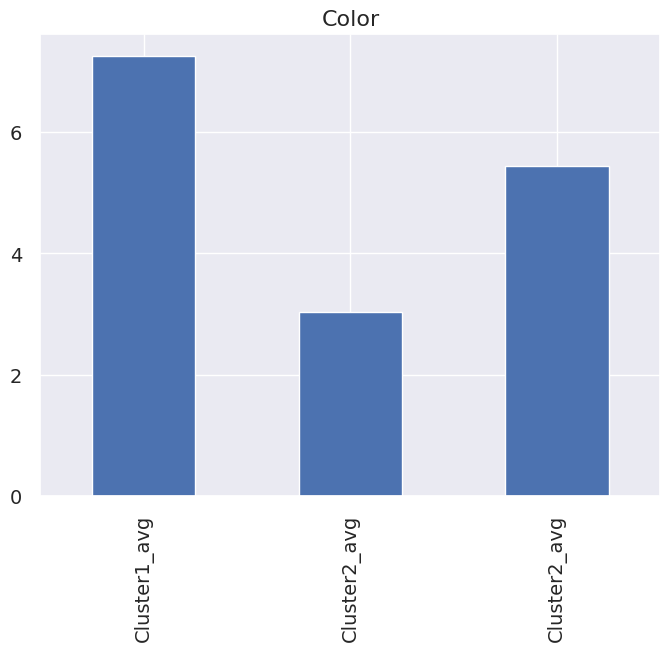

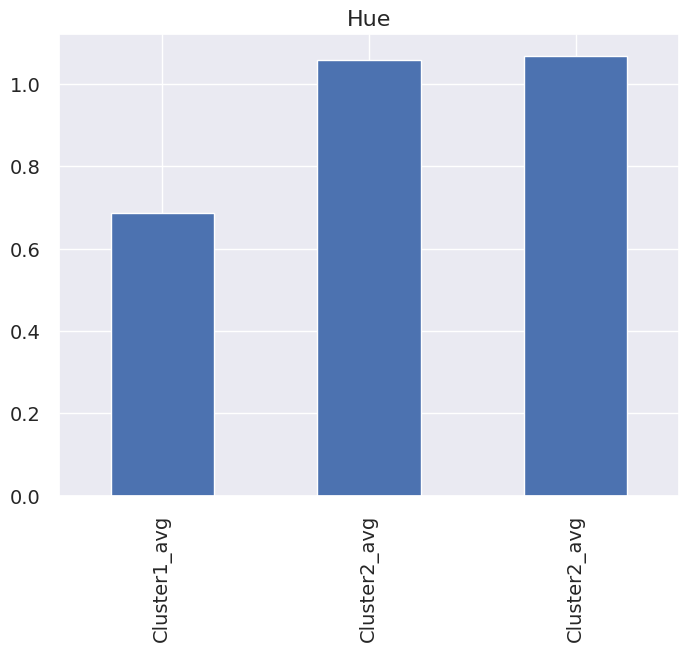

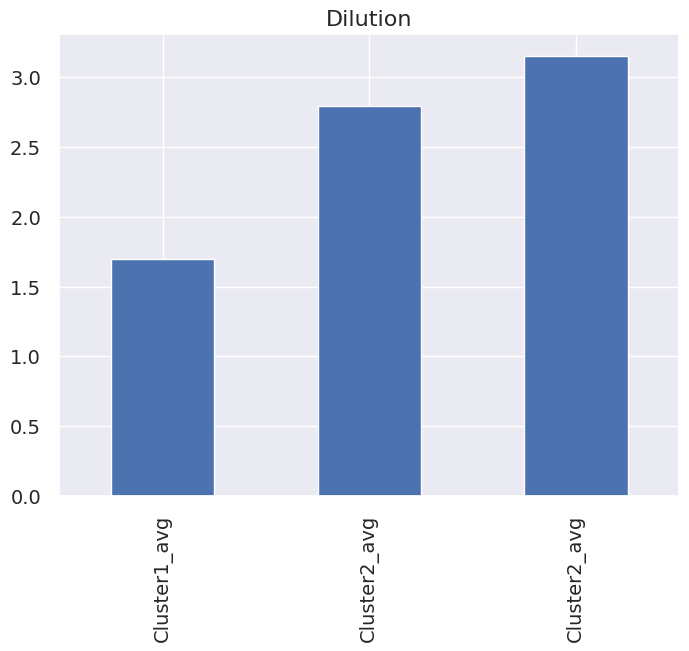

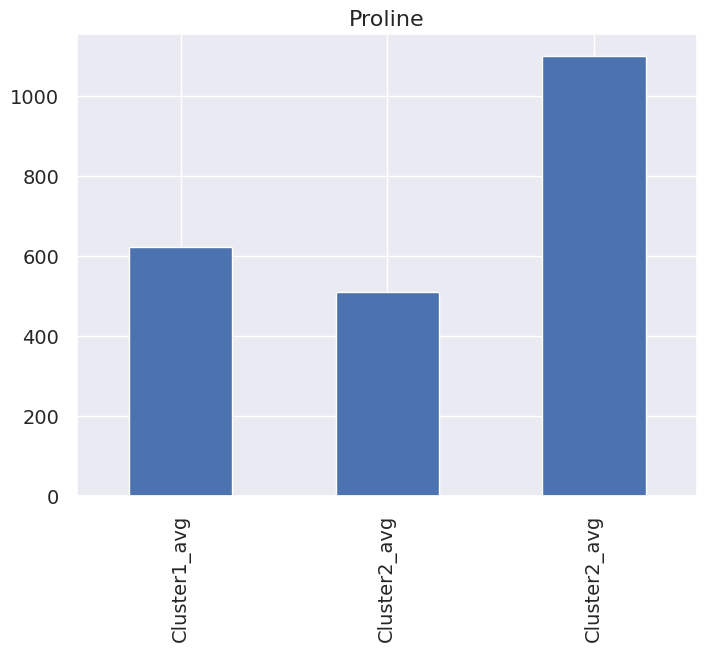

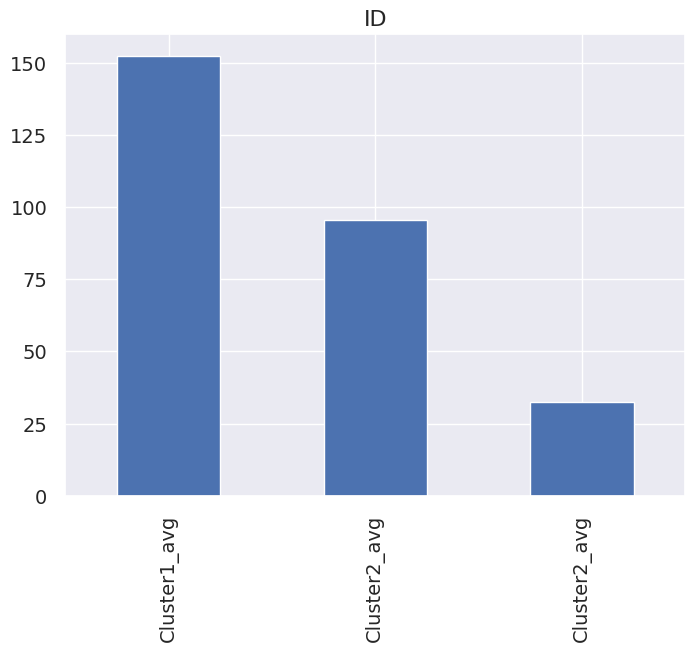

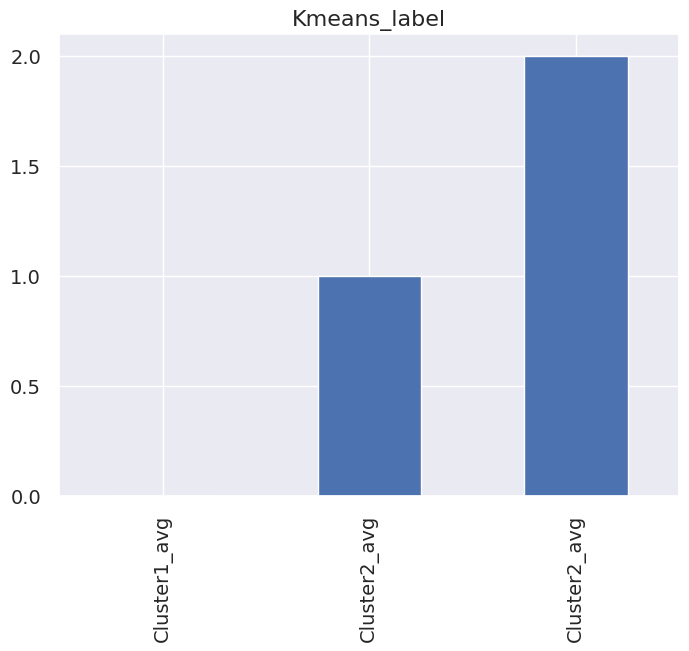

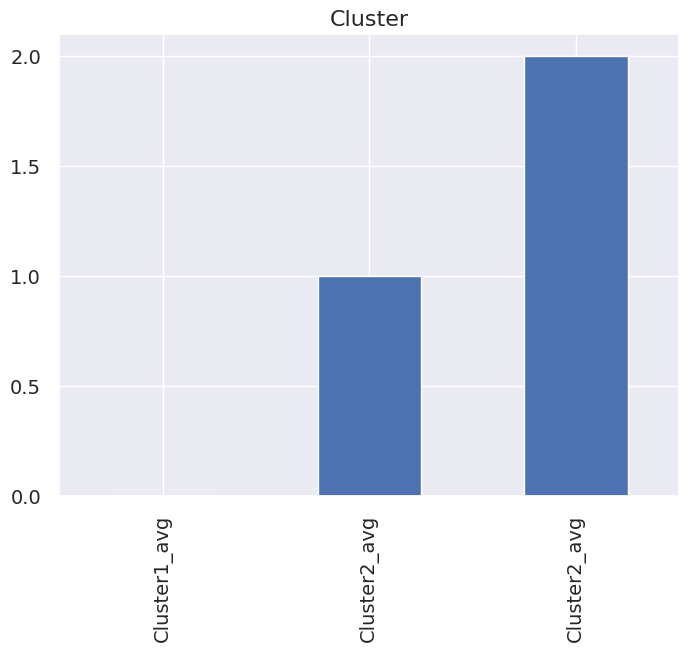

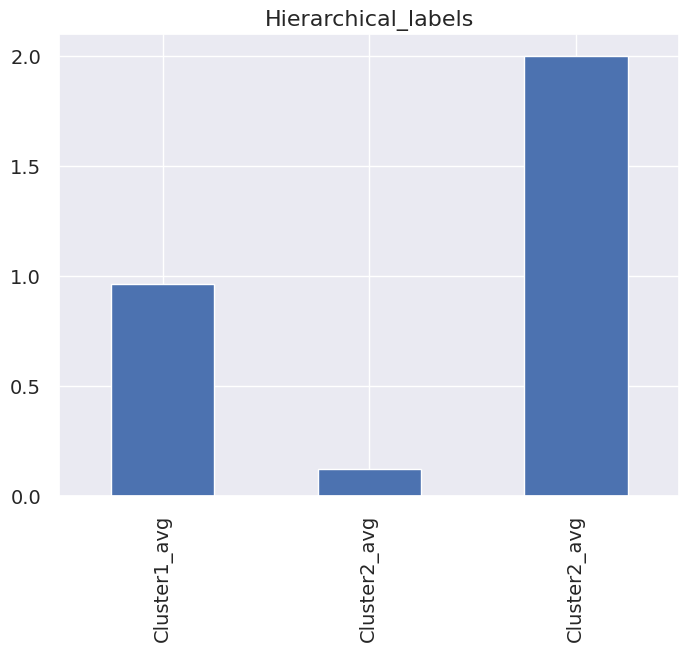

In [131]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

# Conclusion:

I have applied EDA to analyze dataset.Discovered correlation between diff variables and found colinearity.

Applied Standardazation & MinMaxScalar transformation on the data to use Principle componets analysis effectively.

I have used & analyzed two clustering techniques here..i) KMeans ii) Hierarchical Clustering

By applying clustering on different PCA obtained with different transformation data shows fluctuation in model score. So finally the Standard Scaler found less score so not used for further model building.